<font color=#760202><center><h1>Projet 6</h1></center> <center><h3>Analysez les ventes d'une librairie</h3></center><center><h4>(Partie 2)<h4><center>
    
    

  
&nbsp; 
    
Ayant mainteant un dataframe exploitable pour la partie analyse, je vais pouvoir commencer à répondre aux demandes d'Annabelle, de Marc et de Julie 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
import statsmodels.api as sm

In [2]:
tcp = pd.read_csv("C:\\Users\\narab\\OneDrive\\Documents\\OpenClassRooms\\Projet 6\\TCP.csv")
custo = pd.read_csv("C:\\Users\\narab\\OneDrive\\Documents\\OpenClassRooms\\Projet 6\\customers.csv")

In [3]:
tcp.head()

,session_id,date,mois,jour,id_prod,price,categ,client_id,sex,birth,age,tranche_age,jours_achat,statut,nombre
0,s_211425,2022-05-20 13:21:29.043970,2022-05,2022-05-20,0_1518,4.18,0,c_103,f,1986,36,31-50,724.0,particulier,1
1,s_158752,2022-02-02 07:55:19.149409,2022-02,2022-02-02,1_251,15.99,1,c_8534,m,1988,34,31-50,716.0,particulier,1
2,s_225667,2022-06-18 15:44:33.155329,2022-06,2022-06-18,0_1277,7.99,0,c_6714,f,1968,54,51-70,729.0,professionnel,1
3,s_52962,2021-06-24 04:19:29.835891,2021-06,2021-06-24,2_209,69.99,2,c_6941,m,2000,22,18-30,490.0,particulier,1
4,s_325227,2023-01-11 08:22:08.194479,2023-01,2023-01-11,0_1509,4.99,0,c_4232,m,1980,42,31-50,727.0,particulier,1


In [4]:
tcp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672263 entries, 0 to 672262
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   session_id   672263 non-null  object 
 1   date         672263 non-null  object 
 2   mois         672263 non-null  object 
 3   jour         672263 non-null  object 
 4   id_prod      672263 non-null  object 
 5   price        672263 non-null  float64
 6   categ        672263 non-null  int64  
 7   client_id    672263 non-null  object 
 8   sex          672263 non-null  object 
 9   birth        672263 non-null  int64  
 10  age          672263 non-null  int64  
 11  tranche_age  672263 non-null  object 
 12  jours_achat  672263 non-null  float64
 13  statut       672263 non-null  object 
 14  nombre       672263 non-null  int64  
dtypes: float64(2), int64(4), object(9)
memory usage: 76.9+ MB


Je m'aperçois que les types de certaines variables ne correspondent aux types attendus, j'effectue les modifications nécessaires puis je pourrais commencer la partie analyse

In [5]:
tcp['date'] = pd.to_datetime(tcp['date'])
tcp['mois'] = tcp['date'].dt.to_period('M')
tcp['jour'] = tcp['date'].dt.to_period('D')
tcp['age'] = tcp['age'].astype(int)
tcp['jours_achat'] = tcp['jours_achat'].astype(int)
tcp['birth'] = tcp['birth'].astype(int)
tcp['categ'] = tcp['categ'].astype('category')

&nbsp; 

## <font color=#2921CA> I - Analyses Univariées (demandes de Marc)
    
&nbsp;
    
Je commence par étudier les demandes de Marc qui seront séparées en 3 partie :
    
    
- L'evolution dans le temps
    

- Les produits
    
    
- Les clients   

&nbsp;    

###  <font color=#009F0C> A - Evolution dans le temps
    
&nbsp;
    
Ici je vais étudier l'évolution dans le temps du Chiffre d'affaires et du nombre de ventes depuis que l'ouvertur de la boutique en ligne
    
Tout d'abord je créer un dataframe regroupant par mois, le chiffre d'affaires et le nombre de ventes    

In [6]:
tcp_mois = tcp.groupby('mois').sum()
tcp_mois = tcp_mois.drop(columns = {'birth','jours_achat','age'})
tcp_mois.rename(columns = {'nombre' : 'nombre_ventes', 'price' : 'CA'}, inplace = True)
tcp_mois = tcp_mois.to_timestamp('M')
tcp_mois.index = tcp_mois.index.strftime('%Y-%m')
tcp_mois.head()

,CA,nombre_ventes
mois,,
2021-03,477378.61,28326
2021-04,470974.07,28129
2021-05,487332.19,27996
2021-06,479416.43,26575
2021-07,478041.94,24492


In [7]:
tcp_mois.describe()

,CA,nombre_ventes
count,24.00000,24.000000
mean,488843.52875,28010.958333
std,40671.08106,2311.984137
min,317884.02000,21387.000000
25%,479072.80750,27829.000000
50%,496779.74000,28283.000000
75%,510728.19250,28767.750000
max,529835.88000,32973.000000


Je créer également 2 tableaux croisé dynamique entre les variables **mois** et **categ**, l'un avec le chiffre d'affaires, l'autre avec le nombre de ventes 

In [8]:
ca_categ_mois = tcp.pivot_table('price', index = 'mois', columns = 'categ', aggfunc = 'sum')
ca_categ_mois['total'] = ca_categ_mois[0] + ca_categ_mois[1] + ca_categ_mois[2]
ca_categ_mois = ca_categ_mois.to_timestamp('M')
ca_categ_mois.index = ca_categ_mois.index.strftime('%Y-%m')
ca_categ_mois.head()

categ,0,1,2,total
mois,,,,
2021-03,191824.49,184845.10,100709.02,477378.61
2021-04,203032.02,154343.66,113598.39,470974.07
2021-05,194263.56,164057.56,129011.07,487332.19
2021-06,166291.95,187218.03,125906.45,479416.43
2021-07,143405.69,186510.71,148125.54,478041.94


In [9]:
ca_categ_mois.describe()

categ,0,1,2,total
count,24.000000,24.000000,24.000000,24.00000
mean,182354.443333,191862.501250,114626.584167,488843.52875
std,19915.677393,41911.723261,19903.908067,40671.08106
min,143405.690000,33409.090000,67953.210000,317884.02000
25%,171650.985000,186094.307500,108007.167500,479072.80750
50%,181894.020000,195343.245000,116193.340000,496779.74000
75%,192119.367500,205128.830000,125191.190000,510728.19250
max,243933.320000,253741.260000,150412.990000,529835.88000


In [10]:
ven_categ_mois = tcp.pivot_table('nombre', index = 'mois', columns = 'categ', aggfunc = 'sum')
ven_categ_mois['total'] = ven_categ_mois[0] + ven_categ_mois[1] + ven_categ_mois[2]
ven_categ_mois = ven_categ_mois.to_timestamp('M')
ven_categ_mois.index = ven_categ_mois.index.strftime('%Y-%m')
ven_categ_mois.head()

categ,0,1,2,total
mois,,,,
2021-03,17968,9037,1321,28326
2021-04,19130,7490,1509,28129
2021-05,18322,8018,1656,27996
2021-06,15741,9163,1671,26575
2021-07,13448,9070,1974,24492


In [11]:
ven_categ_mois.describe()

categ,0,1,2,total
count,24.000000,24.000000,24.000000,24.000000
mean,17140.875000,9365.458333,1504.625000,28010.958333
std,1879.913789,2048.446410,264.013309,2311.984137
min,13448.000000,1647.000000,888.000000,21387.000000
25%,16173.750000,9061.750000,1411.500000,27829.000000
50%,17119.000000,9544.500000,1512.500000,28283.000000
75%,18033.500000,10048.000000,1625.250000,28767.750000
max,22912.000000,12440.000000,1974.000000,32973.000000


A partir de ces 2 dataframes, je vais pouvoir créer des graphiques traçant l'évolution mensuelle du chiffre d'affaires et du nombre de ventes (total et par catégorie)

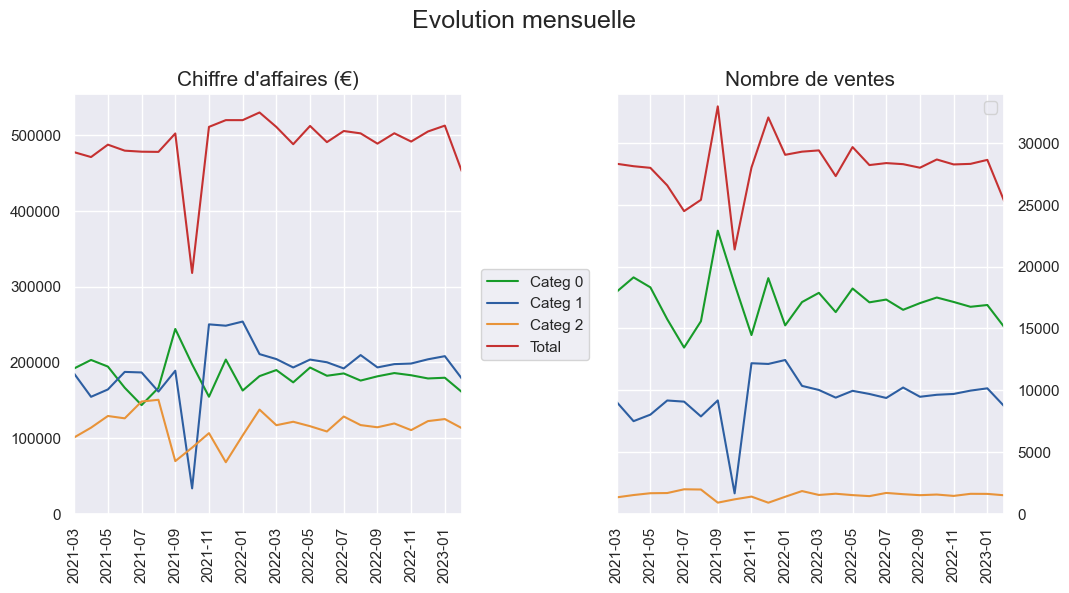

In [13]:
plt.figure(figsize=(12,12))
plt.suptitle("Evolution mensuelle",y=0.95,fontsize=18)

plt.subplot(221)
sns.lineplot(data=ca_categ_mois,palette=['#179B29','#2D5EA1','#E89339','#C53131'],dashes=False)
plt.xticks(np.arange(0,25,2),rotation=90)
plt.xlabel('')
plt.xlim(0,23)
plt.yticks(np.arange(0,600000,100000))
plt.ylabel('')
plt.title("Chiffre d'affaires (€)",fontsize=15)
plt.legend(['Categ 0', 'Categ 1', 'Categ 2','Total'],bbox_to_anchor=(1.03,0.6))


plt.subplot(222)
sns.lineplot(data=ven_categ_mois,palette=['#179B29','#2D5EA1','#E89339','#C53131'],dashes=False)
plt.xticks(np.arange(0,25,2),rotation=90)
plt.xlabel('')
plt.xlim(0,23)
plt.yticks(np.arange(0,40000,5000))
plt.ylabel('')
plt.ylim(0,34000)
plt.tick_params(axis='y', which='both',labelleft=False, labelright=True)
plt.title("Nombre de ventes",fontsize=15)
plt.legend([])

sns.set_theme()
plt.subplots_adjust(wspace=0.4, hspace=0.2)
plt.show()

Ci-dessus, 2 graphiques montrant l'évolution du chiffre d'affaires et du nombre de ventes au cours des 24 derniers mois

Sur le graphique du CA, on remarque une chute anormale du CA total pour le mois d'octobre 2021, également on retrouve cette chute pour le CA de la catégorie 1. D'ailleurs l'allure de la courbe du CA total ressemble à celle de la catégorie 1, cela peut s'expliquer par les courbes des catégories 0 et 2 montrant des fluctuations se compensant

Sur le graphique des ventes, on retrouve également pour le mois d'octobre 2021, le pic le plus bas du nombre de ventes total et pour la catégorie 1. Si pour la catégorie 1, la courbe des ventes présente une allure très similaire à celle du CA, pour les courbes du total, la similitude est moins flagrante. Ceci s'explique notamment par des écarts de valeurs plus important entre les catégories sur le nombre de vente par rapport au CA, avec un nombre de ventes pour la catégorie 0 > catégorie 1 > catégorie 2

&nbsp;

A première vue, Le mois d'octobre 2021 semble être la seule période présentant des valeurs anormales

Je vais regarder les données correspondant à Octobre 2021 afin de les comparer avec les 23 autres mois

In [14]:
ca_tot = ca_categ_mois['total'].sum()
ven_tot = ven_categ_mois['total'].sum()
oct21_ca = ca_categ_mois['total'].iloc[7]
oct21_ven = ven_categ_mois['total'].iloc[7]
ss_oct21_ca = ca_categ_mois['total'].drop(ca_categ_mois.index[7]).mean()
ss_oct21_ven = ven_categ_mois['total'].drop(ca_categ_mois.index[7]).mean()
print("Sur ces 2 premières années :\n\n- Le chiffre d'affaires est de",round(ca_tot/1000000,1),
      "M €\n- Le nombre de ventes est de",round(ven_tot/1000,1),"k\n\nPour le mois d'octobre 2021 :"
      "\n\n- Le chiffre d'affaires est de",round(oct21_ca/1000),"k €\n- Le nombre de ventes est de",round(oct21_ven/1000,1),
      "k\n\nPour les autres mois :\n\n- La moyenne du chiffre d'affaires est de",round(ss_oct21_ca/1000),
      "k €\n- La moyenne du nombre de ventes est de",round(ss_oct21_ven/1000,1),
      "k\n\nCe qui nous donne une baisse de :\n\n-",round(100*(1-oct21_ca/ss_oct21_ca)),
      "% du chiffre d'affaires par rapport à la moyenne des autres mois\n\n-",
      round(100*(1-oct21_ven/ss_oct21_ven)),"% du nombre de ventes par rapport à la moyenne des autres mois")  

Sur ces 2 premières années :

- Le chiffre d'affaires est de 11.7 M €
- Le nombre de ventes est de 672.3 k

Pour le mois d'octobre 2021 :

- Le chiffre d'affaires est de 318 k €
- Le nombre de ventes est de 21.4 k

Pour les autres mois :

- La moyenne du chiffre d'affaires est de 496 k €
- La moyenne du nombre de ventes est de 28.3 k

Ce qui nous donne une baisse de :

- 36 % du chiffre d'affaires par rapport à la moyenne des autres mois

- 24 % du nombre de ventes par rapport à la moyenne des autres mois


### Focus sur Octobre 2021

La baisse du CA et des ventes du mois d'octobre 2021 étant importante et anormale, je vais plonger plus en détails sur ce mois

Je crée un nouveau dataframe filtré uniquement sur Octobre 2021

In [15]:
oct21 = tcp.loc[tcp['mois'] == '2021-10']
oct21.head()

,session_id,date,mois,jour,id_prod,price,categ,client_id,sex,birth,age,tranche_age,jours_achat,statut,nombre
68,s_99013,2021-10-02 17:39:26.919537,2021-10,2021-10-02,0_1409,4.99,0,c_5725,m,1975,47,31-50,714,particulier,1
71,s_99443,2021-10-03 16:05:12.544172,2021-10,2021-10-03,0_1247,15.99,0,c_3394,f,1978,44,31-50,682,particulier,1
80,s_104207,2021-10-13 14:35:01.163737,2021-10,2021-10-13,0_1272,17.01,0,c_8534,m,1988,34,31-50,716,particulier,1
86,s_109442,2021-10-24 13:25:39.888945,2021-10,2021-10-24,0_1102,4.63,0,c_1609,m,1980,42,31-50,729,professionnel,1
93,s_100557,2021-10-05 21:57:27.673800,2021-10,2021-10-05,0_1079,5.99,0,c_7918,m,1987,35,31-50,679,particulier,1


Ici je réitère le procédé utilisé précèdemment en regroupant les données par jour, afin de visualiser l'évolution du chiffre d'affaires et du nombre de ventes sur ce mois 

In [16]:
oct21_jour = oct21.groupby('jour').sum()
oct21_jour.drop(columns = {'birth','age','jours_achat'}, inplace = True)
oct21_jour.rename(columns = {'price':'CA','nombre':'nombre_ventes'},inplace = True)
oct21_jour.head()

,CA,nombre_ventes
jour,,
2021-10-01,16833.48,1030
2021-10-02,9084.30,679
2021-10-03,8844.40,671
2021-10-04,9162.79,635
2021-10-05,9351.32,627


In [17]:
ca_categ_oct21_jour = oct21.pivot_table('price', index = 'jour', columns = 'categ', aggfunc = 'sum')
ca_categ_oct21_jour['total'] = ca_categ_oct21_jour[0] + ca_categ_oct21_jour[1] + ca_categ_oct21_jour[2]
ca_categ_oct21_jour = ca_categ_oct21_jour.to_timestamp('D')
ca_categ_oct21_jour.head(5)

categ,0,1,2,total
jour,,,,
2021-10-01,6842.83,6886.6,3104.05,16833.48
2021-10-02,7043.18,0.0,2041.12,9084.30
2021-10-03,6698.29,0.0,2146.11,8844.40
2021-10-04,6504.11,0.0,2658.68,9162.79
2021-10-05,6318.77,0.0,3032.55,9351.32


In [18]:
ven_categ_oct21_jour = oct21.pivot_table('nombre', index = 'jour', columns = 'categ', aggfunc = 'sum')
ven_categ_oct21_jour['total'] = ven_categ_oct21_jour[0] + ven_categ_oct21_jour[1] + ven_categ_oct21_jour[2]
ven_categ_oct21_jour = ven_categ_oct21_jour.to_timestamp('D')
ven_categ_oct21_jour.head(5)

categ,0,1,2,total
jour,,,,
2021-10-01,653,339,38,1030
2021-10-02,651,0,28,679
2021-10-03,641,0,30,671
2021-10-04,598,0,37,635
2021-10-05,589,0,38,627


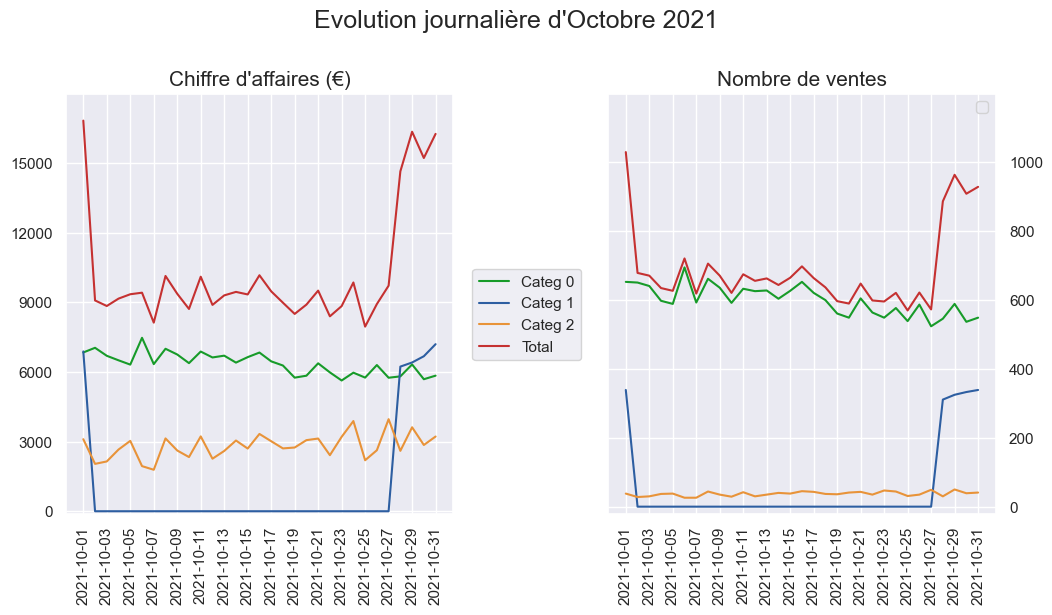

In [19]:
plt.figure(figsize=(12,12))
plt.suptitle("Evolution journalière d'Octobre 2021",y=0.95,fontsize=18)

plt.subplot(221)
sns.lineplot(data=ca_categ_oct21_jour,palette=['#179B29','#2D5EA1','#E89339','#C53131'],dashes=False)
plt.xticks(ca_categ_oct21_jour.index[np.arange(0,31,2)],rotation=90)
plt.xlabel('')
plt.yticks(np.arange(0,18000,3000))
plt.ylim(-100,18000)
plt.ylabel('')
plt.title("Chiffre d'affaires (€)",fontsize=15)
plt.legend(['Categ 0', 'Categ 1', 'Categ 2','Total'],bbox_to_anchor=(1.03,0.6))

plt.subplot(222)
sns.lineplot(data=ven_categ_oct21_jour,palette=['#179B29','#2D5EA1','#E89339','#C53131'],dashes=False)
plt.xticks(ven_categ_oct21_jour.index[np.arange(0,31,2)],rotation=90)
plt.xlabel('')
plt.ylabel('')
plt.yticks(np.arange(0,1200,200))
plt.ylim(-20,1200)
plt.tick_params(axis='y', which='both',labelleft=False, labelright=True)
plt.title("Nombre de ventes",fontsize=15)
plt.legend([])

sns.set_theme()
plt.subplots_adjust(wspace=0.4, hspace=0.2)
plt.show()

On peut voir que les courbes du nombre de ventes et du CA de la catégorie 1 sont nulles entre le 2 octobre 2021 et le 27 octobre 2021, ce qui influe logiquement sur les courbes générales du nombre de ventes et du CA

Durant cette période, seule la catégorie 1 semble affectée, les catégories 0 et 2 restent dans leur standard

### Décomposition en moyenne mobile

Maintenant je vais mettre en place des décompositions en moyenne mobile du chiffre d'affaires :

- Une par périodicité mensuelle avec un roulement de 4 mois 

- Une par périodicité journalière avec un roulement de 7 jours

Avec cela je vais pouvoir évaluer si il existe des tendances particulières du chiffre d'affaires

In [20]:
ca_roll_mois = tcp_mois
ca_roll_mois.drop(columns={'nombre_ventes'},inplace=True)
ca_roll_mois['moy_4m'] = ca_roll_mois['CA'].rolling(4).mean()
ca_roll_mois.head()

,CA,moy_4m
mois,,
2021-03,477378.61,NaN
2021-04,470974.07,NaN
2021-05,487332.19,NaN
2021-06,479416.43,478775.3250
2021-07,478041.94,478941.1575


In [21]:
ca_roll_jour = tcp.groupby('jour').sum()
ca_roll_jour.drop(columns={'birth','nombre','jours_achat','age'},inplace = True)
ca_roll_jour.rename(columns={'price':'CA'},inplace = True)
ca_roll_jour = ca_roll_jour.to_timestamp('D')
ca_roll_jour['moy_7j'] = ca_roll_jour['CA'].rolling(7).mean()
ca_roll_jour.head()

,CA,moy_7j
jour,,
2021-03-01,16409.31,NaN
2021-03-02,15250.51,NaN
2021-03-03,14947.56,NaN
2021-03-04,15107.04,NaN
2021-03-05,17248.76,NaN


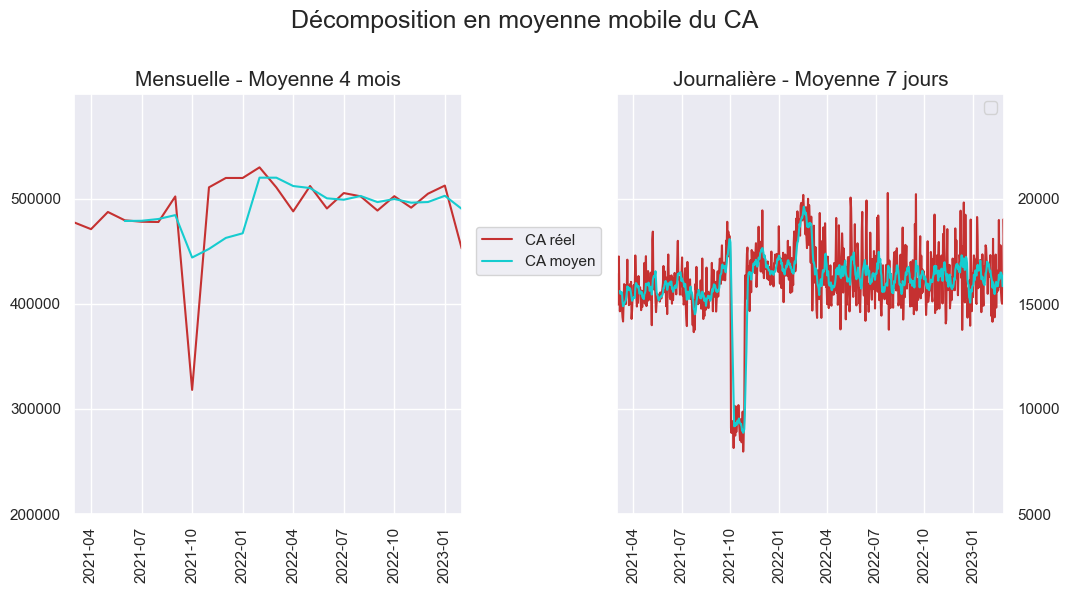

In [22]:
plt.figure(figsize=(12,12))
plt.suptitle("Décomposition en moyenne mobile du CA",y=0.95,fontsize=18)

plt.subplot(221)
sns.lineplot(data=ca_roll_mois,palette=['#C53131','#16CCCF'],dashes=False)
plt.xticks(np.arange(1,24,3),rotation=90)
plt.xlim(ca_roll_mois.index[0],ca_roll_mois.index[23])
plt.xlabel('')
plt.yticks(np.arange(200000,600000,100000))
plt.ylim(200000,600000)
plt.ylabel('')
plt.title("Mensuelle - Moyenne 4 mois",fontsize=15)
plt.legend(['CA réel','CA moyen'],bbox_to_anchor=(1.38,0.7))

plt.subplot(222)
sns.lineplot(data=ca_roll_jour,palette=['#C53131','#16CCCF'],dashes=False)
plt.xticks(rotation=90)
plt.xlim(ca_roll_jour.index[0],ca_roll_jour.index[729])
plt.xlabel('')
plt.yticks(np.arange(5000,25000,5000))
plt.ylim(5000,25000)
plt.ylabel('')
plt.tick_params(axis='y', which='both',labelleft=False, labelright=True)
plt.legend([])
plt.title("Journalière - Moyenne 7 jours",fontsize=15)

sns.set_theme()
plt.subplots_adjust(wspace=0.4, hspace=0.2)
plt.show()

La courbe du CA moyen est plus ou mois stable sur les 2 graphiques, il n'y a pas de tendances particulières qui se dégagent. On remarque une moyenne journalière assez haute en février/mars 2022 qui se stabilisera assez rapidement pour le reste du temps... 

&nbsp;    

###  <font color=#009F0C> B - Produits
    
&nbsp;
    
Dans cette partie, je vais me pencher sur les références des produits ainsi que sur les différences entre les 3 catégories
    
Je commence par créer un dataframe groupé par produits    

In [23]:
caté = tcp[['id_prod','categ']]
tcp_prod = tcp.groupby('id_prod').sum()
tcp_prod['CA'] = tcp_prod['price']
tcp_prod['price'] = tcp_prod['price'] / tcp_prod['nombre']
tcp_prod = tcp_prod.drop(columns = {'birth','jours_achat','age'})
tcp_prod.rename(columns = {'nombre' : 'nombre_ventes'}, inplace = True)
tcp_prod = pd.merge(caté,tcp_prod,on='id_prod',sort=True)
tcp_prod.drop_duplicates(inplace=True)
tcp_prod.index = np.arange(0,len(tcp_prod),1)
tcp_prod.head()

,id_prod,categ,price,nombre_ventes,CA
0,0_0,0,3.75,1229,4608.75
1,0_1,0,10.99,481,5286.19
2,0_10,0,17.95,22,394.90
3,0_100,0,20.60,3,61.80
4,0_1000,0,6.84,430,2941.20


In [24]:
tcp_prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3266 entries, 0 to 3265
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id_prod        3266 non-null   object  
 1   categ          3266 non-null   category
 2   price          3266 non-null   float64 
 3   nombre_ventes  3266 non-null   int64   
 4   CA             3266 non-null   float64 
dtypes: category(1), float64(2), int64(1), object(1)
memory usage: 130.9+ KB


In [25]:
tcp_prod.describe(include='all')

,id_prod,categ,price,nombre_ventes,CA
count,3266,3266.0,3266.000000,3266.000000,3266.000000
unique,3266,3.0,NaN,NaN,NaN
top,0_0,0.0,NaN,NaN,NaN
freq,1,2293.0,NaN,NaN,NaN
mean,NaN,NaN,21.757572,205.836803,3592.236586
std,NaN,NaN,29.583820,327.862168,7292.133819
min,NaN,NaN,0.620000,1.000000,0.990000
25%,NaN,NaN,6.990000,17.000000,231.052500
50%,NaN,NaN,13.035000,57.000000,793.125000
75%,NaN,NaN,22.990000,235.750000,3369.262500


Je vais ensuite visualiser les variations de répartitions des prix par catégorie

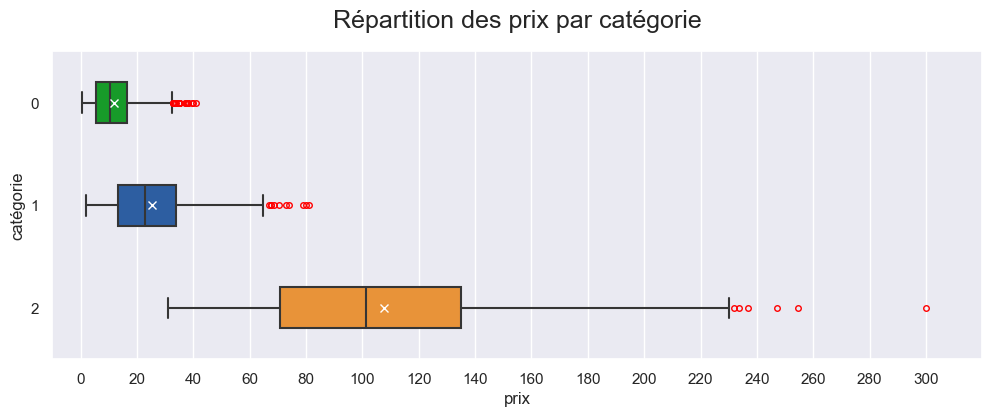

In [26]:
plt.figure(figsize=(12,4))
plt.title("Répartition des prix par catégorie",fontsize=18,y=1.05)

sns.boxplot(data=tcp_prod,y='categ',x='price',palette=['#179B29', '#2D5EA1', '#E89339'],saturation=1,width=0.4,
           fliersize=4,flierprops={'marker':'o','markeredgecolor': 'red','markerfacecolor': 'none'},
            showmeans=True,meanprops={"marker":"x","markerfacecolor":"white",'markeredgecolor': 'white'})
plt.ylabel('catégorie')
plt.xlabel('prix')
plt.xlim(-10,320)
plt.xticks(np.arange(0,320,20))

plt.show()

On peut voir que une différence au niveau des prix en fonction de la catégorie :


- Catégorie 0 : Les prix sont plutôt petits et varient dans un intervalle resserré


- Catégorie 1 : Les prix sont un peu plus élevés et varient dans un intervalle un peu plus large que ceux de la catégorie 0


- Catégorie 2 : Les prix sont beaucoup plus élevés et varient dans un intervalle beaucoup plus large que les 2 autres catégories


Que ce soit pour la moyenne, la médiane, Q1, Q3 et les extrêmes inférieurs et supérieurs  on a : prix_0 < prix_1 < prix_2

&nbsp;

Ensuite j'aimerais avoir la répartition du chiffre d'affaires et du nombre de ventes par catégorie

Je créer un nouveau dataframe groupé par catégorie, avec lequel je vais pouvoir créer des graphiques me permettant de visualiser ces répartitions

In [27]:
categ = tcp_prod.groupby('categ').sum()
categ = categ.drop(columns = 'price')
categ.head()

,nombre_ventes,CA
categ,,
0,411381,4376506.64
1,224771,4604700.03
2,36111,2751038.02


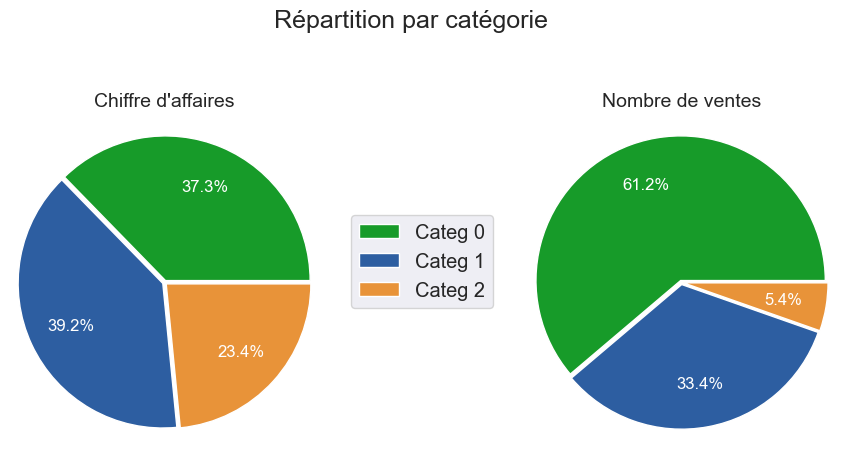

In [28]:
fig, axes = plt.subplots(1, 2,figsize=(10,6))
fig.suptitle("Répartition par catégorie",y=0.95,fontsize=18)

axes[0].pie(categ['CA'], labels=categ.index, autopct='%1.1f%%',pctdistance=0.7,textprops={'color':'white'},
           radius = 1.4,explode=(0.02,0.02,0.02),colors=['#179B29', '#2D5EA1', '#E89339'],startangle=0)
axes[0].set_title("Chiffre d'affaires",y=1.15,fontsize=14)
axes[0].legend(['Categ 0', 'Categ 1', 'Categ 2'],loc=(1.22,0.4),fontsize='large')

axes[1].pie(categ['nombre_ventes'], labels=categ.index, autopct='%1.1f%%',pctdistance=0.7,textprops={'color':'white'},
           radius=1.4,explode=(0.02,0.02,0.02),colors=['#179B29', '#2D5EA1', '#E89339'],startangle=0)
axes[1].set_title('Nombre de ventes',y=1.15,fontsize=14)

plt.subplots_adjust(wspace=1)
plt.show()

On peut voir pour le nombre de ventes, qu'il y a une différence notable de répartition selon les catégories

Cependant cette différence ne se répercute pas sur la répartition du CA, qui est plus équilibrée, due à la différence de prix des produits de chaque catégorie

En effet on peut voir que la catégorie 0, dont les prix sont les plus faibles, présente le plus de ventes. La catégorie 1, dont les prix se situent au milieu, présente un également un nombre de ventes compris entre ceux la catégorie 0 et 2. La catégorie 2, dont les prix étaient très largement supérieurs aux 2 autres catégories, présente un nombre relativement faible

&nbsp;

### Tops & Flops

Pour finir la partie "Produits", je vais jeter un oeil sur les produits les plus et les moins vendus, ainsi que ceux ayant rapporté le plus ou le moins de chiffre d'affaires

&nbsp;

**Nombre de ventes :**

In [29]:
tcp_prod.loc[tcp_prod['nombre_ventes'] == 1]

,id_prod,categ,price,nombre_ventes,CA
166,0_1151,0,2.99,1,2.99
313,0_1284,0,1.38,1,1.38
417,0_1379,0,2.99,1,2.99
549,0_1498,0,2.48,1,2.48
595,0_1539,0,0.99,1,0.99
665,0_1601,0,1.99,1,1.99
698,0_1633,0,24.99,1,24.99
752,0_1683,0,2.99,1,2.99
802,0_1728,0,2.27,1,2.27
1327,0_2201,0,20.99,1,20.99


In [30]:
tcp_prod.nlargest(10,'nombre_ventes')

,id_prod,categ,price,nombre_ventes,CA
2592,1_369,1,23.99,2230,53497.70
2645,1_417,1,20.99,2168,45506.32
2642,1_414,1,23.83,2150,51234.50
2734,1_498,1,23.37,2116,49450.92
2654,1_425,1,16.99,2081,35356.19
2630,1_403,1,17.99,1935,34810.65
2640,1_412,1,16.65,1931,32151.15
2641,1_413,1,17.99,1927,34666.73
2633,1_406,1,24.81,1925,47759.25
2634,1_407,1,15.99,1909,30524.91


Lors de la partie 1 du projet, j'avais décidé de joindre mes 2 dataframes du coté de celui des transactions de la boutique en ligne, logiquement tout les produits présents dans ce dataframe ont été vendus au minimun une fois

Du coté des flops, avec 1 seul exemplaire vendu, on a majoritairement des produits de la catégorie 0 et quelques produits de la catégorie 2

Du coté du top 10, avec un nombre d'exemplaires vendus compris entre 1900 et 230, il y a a uniquement des produits de la catégorie 1

&nbsp;

**Chiffre d'affaires :**

In [31]:
tcp_prod.nsmallest(10,'CA')

,id_prod,categ,price,nombre_ventes,CA
595,0_1539,0,0.99,1,0.99
313,0_1284,0,1.38,1,1.38
719,0_1653,0,0.99,2,1.98
665,0_1601,0,1.99,1,1.99
1785,0_541,0,1.99,1,1.99
2080,0_807,0,1.99,1,1.99
802,0_1728,0,2.27,1,2.27
1545,0_324,0,1.18,2,2.36
549,0_1498,0,2.48,1,2.48
2180,0_898,0,1.27,2,2.54


In [32]:
tcp_prod.nlargest(10,'CA')

,id_prod,categ,price,nombre_ventes,CA
3097,2_159,2,145.99,641,93579.59
3071,2_135,2,68.99,993,68507.07
3046,2_112,2,67.57,956,64596.92
3035,2_102,2,59.14,1022,60441.08
3153,2_209,2,69.99,806,56411.94
2620,1_395,1,28.99,1849,53602.51
2592,1_369,1,23.99,2230,53497.70
3044,2_110,2,62.25,856,53286.00
3202,2_39,2,57.99,905,52480.95
3105,2_166,2,230.04,227,52219.08


On retrouve au niveau des flops, avec un chiffre d'affaires sous les 3 €, logiquement des produits de la catégorie 0 dont les prix sont les généralement les plus bas et composant majoritairement la liste des flops des ventes

Du coté des tops, avec un chiffre d'affaires compris entre 50k et 100k €, 8 produits de la catégorie 2 dont les prix sont les généralement les plus hauts, ainsi que 2 produits de la catégorie 1 dont l'article le plus vendu et un autre proche du top 10

&nbsp;    

###  <font color=#009F0C> C - Clients
    
&nbsp;  

Dans cette partie, je vais me pencher sur les différents clients, en particuliers sur les tops acheteurs, la répartition du chiffre d'affaires entre nos clients et la répartition des clients selon leur sexe et leur age

Je commence par créer un dataframe groupé par client, j'ai également importé le dataframe "*custo*" pour joindre facilement les variables qualitatives correspondant aux clients

In [33]:
tcp_client = tcp.groupby('client_id').sum()
tcp_client = tcp_client.drop(columns = 'birth')
tcp_client.rename(columns = {'nombre' : 'nombre_achats', 'price' : 'panier_total'}, inplace = True)
tcp_client = pd.merge(custo, tcp_client, on='client_id', how = 'right')
tcp_client['jours_achat'] = tcp_client['jours_achat'] / tcp_client['nombre_achats']
tcp_client['age'] = tcp_client['age'] / tcp_client['nombre_achats']
tcp_client['age'] = tcp_client['age'].astype(int)
tcp_client = tcp_client[['client_id','sex','birth','age','jours_achat','nombre_achats','panier_total']]
tcp_client.head()

,client_id,sex,birth,age,jours_achat,nombre_achats,panier_total
0,c_1,m,1955,67,583.0,38,547.19
1,c_10,m,1956,66,677.0,58,1353.60
2,c_100,m,1992,30,518.0,8,254.85
3,c_1000,f,1966,56,682.0,124,2233.35
4,c_1001,m,1982,40,718.0,101,1793.66


In [34]:
tcp_client.describe()

,birth,age,jours_achat,nombre_achats,panier_total
count,8600.000000,8600.000000,8600.000000,8600.000000,8600.000000
mean,1978.260698,43.739302,656.531279,78.170116,1364.214499
std,16.908755,16.908755,93.653346,309.328076,5132.609200
min,1929.000000,18.000000,0.000000,1.000000,6.310000
25%,1966.000000,30.000000,641.000000,27.000000,540.170000
50%,1979.000000,43.000000,689.000000,51.000000,1018.185000
75%,1992.000000,56.000000,711.000000,95.000000,1762.417500
max,2004.000000,93.000000,729.000000,25239.000000,321011.260000


### Top acheteurs

Je commence par regarder les tops 10 en terme panier total et de nombre d'achats 

In [35]:
tcp_client.nlargest(10,'panier_total')

,client_id,sex,birth,age,jours_achat,nombre_achats,panier_total
677,c_1609,m,1980,42,729.0,25239,321011.26
4388,c_4958,m,1999,23,729.0,5142,286842.26
6337,c_6714,f,1968,54,729.0,9091,152198.39
2724,c_3454,m,1969,53,729.0,6698,112512.96
634,c_1570,f,1979,43,720.0,368,5259.63
2513,c_3263,f,1985,37,713.0,397,5208.29
1268,c_2140,f,1977,45,713.0,397,5150.39
2108,c_2899,f,1994,28,699.0,103,5120.87
7006,c_7319,f,1974,48,725.0,367,5096.95
7120,c_7421,m,1978,44,723.0,378,5046.21


In [36]:
tcp_client.nlargest(10,'nombre_achats')

,client_id,sex,birth,age,jours_achat,nombre_achats,panier_total
677,c_1609,m,1980,42,729.0,25239,321011.26
6337,c_6714,f,1968,54,729.0,9091,152198.39
2724,c_3454,m,1969,53,729.0,6698,112512.96
4388,c_4958,m,1999,23,729.0,5142,286842.26
1268,c_2140,f,1977,45,713.0,397,5150.39
2513,c_3263,f,1985,37,713.0,397,5208.29
1772,c_2595,m,1974,48,713.0,392,4883.53
1197,c_2077,f,1984,38,727.0,380,4783.26
7120,c_7421,m,1978,44,723.0,378,5046.21
708,c_1637,f,1988,34,713.0,374,4639.06


Dans ces 2 tops 10, je remarque qu'il y a un écart net entre après le top 4 (avec les 4 mêmes identifiants dans les 2 tops)

Pour le panier total, ce top 4 est compris entre 113k et 335k €, alors que le 5e est tout juste au dessus des 5k € 

Pour le nombre d'achats, ce top 4 est compris entre 5k et 26k, alors que le 5e est tout juste au dessus des 400

Je suppose que ce top 4 ne sont des clients professionnels et non des particuliers. Je vais donc créer une nouvelle variable **statut** (déjà présente dans "*tcp*") prenant la valeur 'professionnel' pour ces 4 clients et la valeur 'particulier' pour les autres

Je vais ensuite créer un dataframe groupé par statut pour voir la proportion que ces 4 clients présente pour le chiffre d'affaires et nombre de ventes

In [37]:
pro = ['c_1609','c_4958','c_6714','c_3454']
tcp_client['statut'] = ["professionnel" if i in pro else "particulier" for i in tcp_client['client_id']]
tcp_statut = tcp_client.groupby('statut').sum()
tcp_statut.drop(columns=['birth','age','jours_achat'],inplace = True)
tcp_statut

,nombre_achats,panier_total
statut,,
particulier,626093,10859679.82
professionnel,46170,872564.87


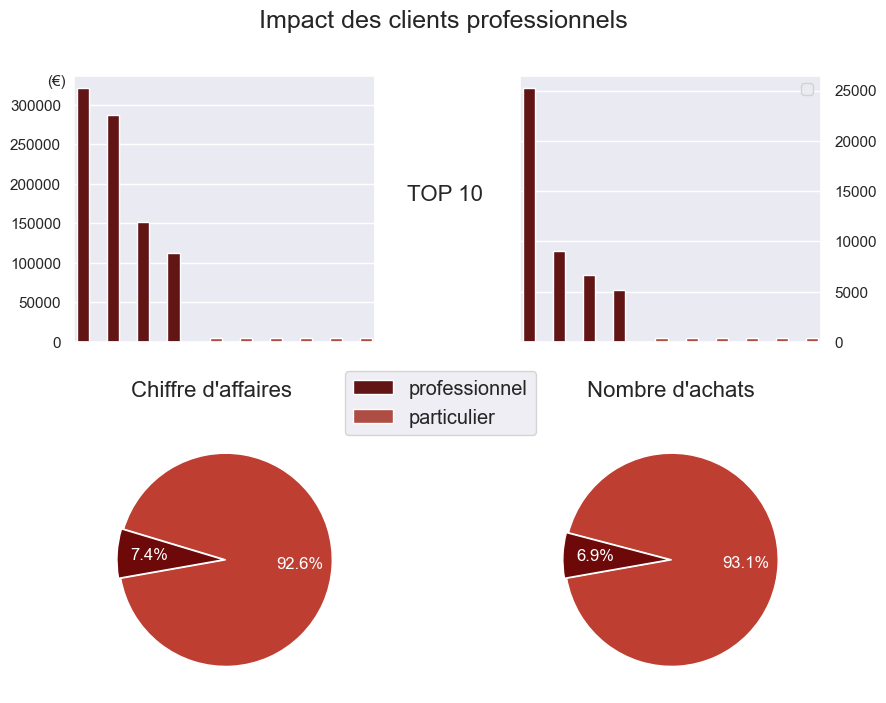

<Figure size 1500x1500 with 0 Axes>

In [38]:
fig, axes = plt.subplots(2, 2,figsize=(7,4))
fig.suptitle('Impact des clients professionnels',fontsize=18,y=1.5)
plt.figure(figsize=(15,15))

sns.barplot(ax=axes[0,0],data=tcp_client.nlargest(10,'panier_total'), x='client_id', y='panier_total',
            hue='statut',palette = ['#6D0909','#BE3F32'])
axes[0,0].set_title("(€)",fontsize = 11,x=-0.06,y=0.93)
axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('')
axes[0,0].set_xticks([])
axes[0,0].legend(loc=(0.9,-0.35),fontsize='large')

sns.barplot(ax=axes[0,1],data=tcp_client.nlargest(10,'nombre_achats'), x='client_id', y='nombre_achats',
            hue='statut', palette = ['#6D0909','#BE3F32'])
axes[0,1].set_title("TOP 10",fontsize = 16,x=-0.25,y=0.5)
axes[0,1].yaxis.tick_right()
axes[0,1].yaxis.set_tick_params(right = False)
axes[0,1].set_xlabel('')
axes[0,1].set_ylabel('')
axes[0,1].set_xticks([])
axes[0,1].legend('')


axes[1,0].pie(tcp_statut['panier_total'], labels=tcp_statut.index, autopct='%1.1f%%',pctdistance=0.7,textprops={'color':'white'},
              radius = 1,explode=(0.01,0.01),colors=['#BE3F32','#6D0909'],startangle=190)
axes[1,0].set_title("Chiffre d'affaires",fontsize=16,x=0.45,y=1.08)

axes[1,1].pie(tcp_statut['nombre_achats'], labels=tcp_statut.index, autopct='%1.1f%%',pctdistance=0.7,textprops={'color':'white'},
              radius=1,explode=(0.01,0.01),colors=['#BE3F32','#6D0909'],startangle=190)
axes[1,1].set_title("Nombre d'achats",fontsize=16,x=0.5,y=1.08)


fig.tight_layout(pad=-5, w_pad=-5, h_pad=0)
plt.show()

In [39]:
ca_pro = tcp_client['panier_total'].loc[tcp_client['statut'] == "professionnel"].sum()
ven_pro = tcp_client['nombre_achats'].loc[tcp_client['statut'] == "professionnel"].sum()

print("Parmis nos",len(tcp_client),"clients, on compte 4 clients professionnels, ce qui représente moins de",
      round(100*4/len(tcp_client),2),"% du nombre de nos clients.\n\nLes dépenses de ces 4 clients s'élève à",
      round(ca_pro/1000,1),"milliers €, soit",round(100*ca_pro/ca_tot,2),"% du CA global (=",round(ca_tot/1000000,1),
      "M €)\n\nLe nombre d'achats de ces 4 clients s'élève à",round(ven_pro/1000),"k produits, soit",round(100*ven_pro/ven_tot,2),
      "% du nombre total d'achats (=",round(ven_tot/1000,1),"k produits)")

Parmis nos 8600 clients, on compte 4 clients professionnels, ce qui représente moins de 0.05 % du nombre de nos clients.

Les dépenses de ces 4 clients s'élève à 872.6 milliers €, soit 7.44 % du CA global (= 11.7 M €)

Le nombre d'achats de ces 4 clients s'élève à 46 k produits, soit 6.87 % du nombre total d'achats (= 672.3 k produits)


L'impact de ces 4 clients est net et représente une partie non négligeable du chiffre d'affaires de la boutique en ligne

Comme on peut le constaté avec les graphiques ci-dessus l'écart entre ce top 4 et le reste du top 10 est remarquable, tel que les barres du reste du top 10 sont presque invisible (pour le panier total l'écart entre le 4e et le 5e est de plus de 21 fois inférieur et pour le nombre d'achats l'écart entre le 4e et le 5e est de plus de 12 fois inférieur)

Ces 4 clients ne représentant pas des clients "lambda", il sera probablement utile de les enlever lors de certaines de nos futurs analyses sur le clients

&nbsp;

Maintenant je vais regarder la répartition du chiffre d'affaires entre nos clients via une courbe de Lorenz

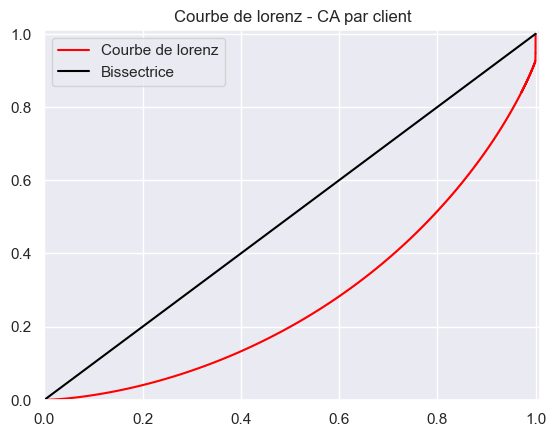

In [40]:
pan_tot = tcp_client['panier_total'].values 
n = len(pan_tot) 
lorenz = np.cumsum(np.sort(pan_tot)) / pan_tot.sum() 
lorenz = np.append([0],lorenz)
xaxis = np.linspace(0-1/n,1+1/n,n+1)
plt.plot(xaxis,lorenz,drawstyle = 'steps-post',label = 'Courbe de lorenz',color='red')
plt.plot(xaxis,xaxis,label = 'Bissectrice',color='black')
plt.legend()
plt.title('Courbe de lorenz - CA par client')
plt.xlim(0,1.01)
plt.ylim(0,1.01)
plt.show()

In [41]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n
S = 0.5 - AUC
gini = 2*S
round(gini,2)

0.45

In [42]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n
S = 0.5 - AUC
gini = 2*S
mpt = np.quantile(pan_tot, 0.5)
sptim = tcp_client['panier_total'].loc[tcp_client['panier_total'] <= mpt].sum()
tcp_client_sort = tcp_client.sort_values('panier_total')
tcp_client_sort['somme_cumul'] = tcp_client_sort['panier_total'].cumsum() 
ncimca = len(tcp_client_sort.loc[tcp_client_sort['somme_cumul'] <= ca_tot / 2])

print("La répartition du chiffre d'affaires entre nos clients présente un indice de Gini =",round(gini,2),
      "\n\nCet indice, compris entre 0 et 1, mesure le niveau d'inégalité de la répartition d'une variable."
      " S'il est égale à 0, on a une\nréparition parfaitement égalitaire. S'il est égale à 1, on a une réparition"
      "totalement inégalitaire avec un seul individu\npossédant la totatilé des valeurs\n\n"
      "Ici on peut donc dire qu'on a une répartition du chiffre d'affaires avec un niveau d'inégalité 'moyen'\n\n"
      "Plus précisément, le chiffre d'affaires est réparti tel que :\n\n- 50 % de nos clients (les + dépensiés) représente",
      round(100*(1 - (sptim / ca_tot )),1),"% du CA \n- 50 % de nos clients (les - dépensiés) représente",
      round(100 * sptim / ca_tot,1),"% du CA\n\nEgalement :\n- 50 % du CA est généré par",round(100*(1 - ncimca / n),1),
      "% de nos clients (les + dépensiés)\n- 50 % du CA est généré par",round(100 * ncimca / n,1),"% de nos clients (les - dépensiés)")


La répartition du chiffre d'affaires entre nos clients présente un indice de Gini = 0.45 

Cet indice, compris entre 0 et 1, mesure le niveau d'inégalité de la répartition d'une variable. S'il est égale à 0, on a une
réparition parfaitement égalitaire. S'il est égale à 1, on a une réparitiontotalement inégalitaire avec un seul individu
possédant la totatilé des valeurs

Ici on peut donc dire qu'on a une répartition du chiffre d'affaires avec un niveau d'inégalité 'moyen'

Plus précisément, le chiffre d'affaires est réparti tel que :

- 50 % de nos clients (les + dépensiés) représente 80.1 % du CA 
- 50 % de nos clients (les - dépensiés) représente 19.9 % du CA

Egalement :
- 50 % du CA est généré par 21.1 % de nos clients (les + dépensiés)
- 50 % du CA est généré par 78.9 % de nos clients (les - dépensiés)


### Répartition genre / age

Je vais maintenant me pencher sur la répartition de nos différents clients, ici je ne vais considérer que les clients particuliers

J'ajoute à "*tcp_client*" la variable **tranche_age** (déjà présente dans "*tcp*")

Puis je vais créer 3 dataframes groupé selon les valeurs des variables **sex**, **age** et **tranche_age**

In [43]:
tranche_age = ['18-30','31-50','51-70','71-99']
tcp_client['tranche_age'] = pd.cut(tcp_client['age'],bins=[18,31,51,71,100], right=False,labels=tranche_age)
tcp_client.head()

,client_id,sex,birth,age,jours_achat,nombre_achats,panier_total,statut,tranche_age
0,c_1,m,1955,67,583.0,38,547.19,particulier,51-70
1,c_10,m,1956,66,677.0,58,1353.60,particulier,51-70
2,c_100,m,1992,30,518.0,8,254.85,particulier,18-30
3,c_1000,f,1966,56,682.0,124,2233.35,particulier,51-70
4,c_1001,m,1982,40,718.0,101,1793.66,particulier,31-50


In [44]:
tcp_client['nombre_clients'] = 1
tcp_client_parti = tcp_client.loc[tcp_client['statut'] == "particulier"]
tcp_genre = tcp_client_parti.groupby('sex').sum()
tcp_genre = tcp_genre.drop(columns = ['birth','age','jours_achat'])
tcp_genre['moyenne_panier_total'] = tcp_genre['panier_total'] / tcp_genre['nombre_clients']
tcp_genre['moyenne_nombre_achats'] = tcp_genre['nombre_achats'] /tcp_genre['nombre_clients']
tcp_genre.rename(index={'f':'F','m':'M'},columns = {'panier_total':'CA'},inplace = True)
tcp_genre = tcp_genre[['nombre_clients','CA','nombre_achats','moyenne_panier_total','moyenne_nombre_achats']]
tcp_genre.head()

,nombre_clients,CA,nombre_achats,moyenne_panier_total,moyenne_nombre_achats
sex,,,,,
F,4478,5648853.33,325897,1261.467916,72.777356
M,4118,5210826.49,300196,1265.377972,72.898494


In [45]:
tcp_age = tcp_client_parti.groupby('age',as_index=False).sum()
tcp_age['moyenne_panier_total'] = tcp_age['panier_total'] / tcp_age['nombre_clients']
tcp_age['moyenne_nombre_achats'] = tcp_age['nombre_achats'] / tcp_age['nombre_clients']
tcp_age.rename(columns = {'panier_total':'CA'},inplace = True)
tcp_age = tcp_age.drop(columns = ['birth','jours_achat'])
tcp_age = tcp_age[['nombre_clients','CA','nombre_achats','moyenne_panier_total','moyenne_nombre_achats']]
tcp_age.head()

,nombre_clients,CA,nombre_achats,moyenne_panier_total,moyenne_nombre_achats
0,437,603063.91,15011,1380.008947,34.350114
1,145,175673.35,4315,1211.540345,29.758621
2,145,182607.39,4544,1259.361310,31.337931
3,125,176119.53,4201,1408.956240,33.608000
4,136,163955.18,4382,1205.552794,32.220588


In [46]:
tcp_tranche_age = tcp_client_parti.groupby('tranche_age').sum()
tcp_tranche_age['moyenne_panier_total'] = tcp_tranche_age['panier_total'] / tcp_tranche_age['nombre_clients']
tcp_tranche_age['moyenne_nombre_achats'] = tcp_tranche_age['nombre_achats'] / tcp_tranche_age['nombre_clients']
tcp_tranche_age = tcp_tranche_age.drop(columns={'birth','age','jours_achat',})
tcp_tranche_age.rename(columns={'panier_total':'CA'},inplace=True)
tcp_tranche_age = tcp_tranche_age[['nombre_clients','CA','nombre_achats','moyenne_panier_total','moyenne_nombre_achats']]
tcp_tranche_age.head()

,nombre_clients,CA,nombre_achats,moyenne_panier_total,moyenne_nombre_achats
tranche_age,,,,,
18-30,2266,2973708.86,73893,1312.316355,32.609444
31-50,3365,5159866.99,389603,1533.392865,115.780981
51-70,2387,2215427.87,131997,928.122275,55.298282
71-99,578,510676.10,30600,883.522664,52.941176


Ensuite, je vais générer des graphiques me permettant de visualier la répartition des clients selon leur genre et leur age

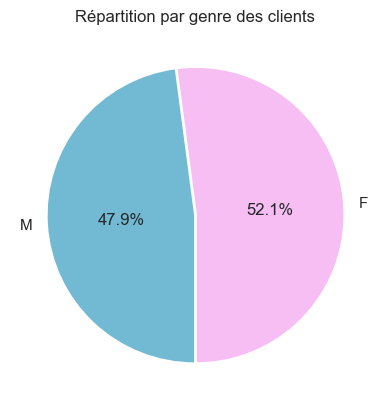

In [47]:
plt.figure()
plt.title("Répartition par genre des clients")

plt.pie(x=tcp_genre['nombre_clients'],labels=tcp_genre.index,autopct='%1.1f%%',pctdistance=0.5,
        radius=1,startangle=-90,explode=(0.01,0.0),colors=['#F6BEF3','#72BAD3'])

plt.show()

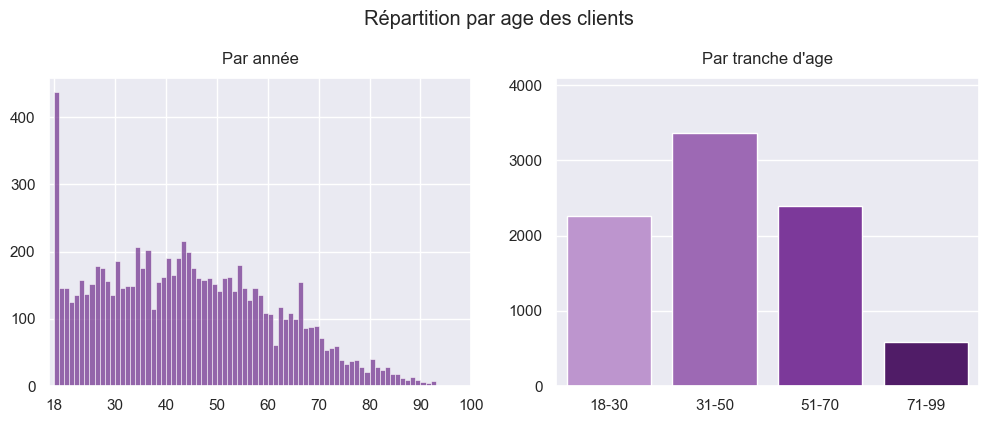

<Figure size 1000x1000 with 0 Axes>

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
fig.suptitle('Répartition par age des clients',y=1.05)
plt.figure(figsize=(10,10))

sns.histplot(ax=axes[0], x=tcp_client_parti['age'], bins=75,color='#763892')
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].set_title('Par année',y=1.02)
axes[0].set_xlim(17,94)
axes[0].set_xticks([18,30,40,50,60,70,80,90,100])

sns.barplot(ax=axes[1],data=tcp_tranche_age, x=tcp_tranche_age.index, y='nombre_clients',
            palette=['#C18BD8','#A25CC1','#8229AA','#550F74'])
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_yticks([0,1000,2000,3000,4000])
axes[1].set_ylim(0,4100)
axes[1].set_title("Par tranche d'age",y=1.02)

sns.set_theme()
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

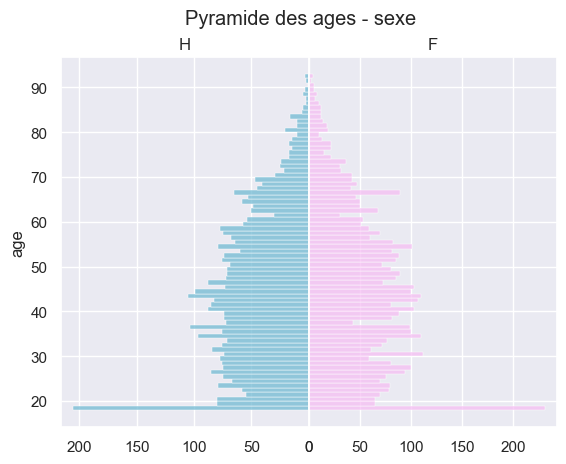

In [49]:
fig, axes = plt.subplots(1, 2)
fig.suptitle('Pyramide des ages - sexe')


sns.histplot(ax=axes[0], y=tcp_client_parti['age'].loc[tcp_client['sex']=='m'], bins=75,color='#72BAD3')
axes[0].invert_xaxis()
axes[0].set_xlabel('')
axes[0].set_title('H')


sns.histplot(ax=axes[1], y=tcp_client_parti['age'].loc[tcp_client['sex']=='f'], bins=75,color='#F6BEF3')
axes[1].set_yticklabels([])
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_title('F')

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

La répartition des clients par genre est plus ou moins égale, avec légèrement un peu plus de femmes que d'hommes

Quand à la répartition par age, on constate que l'age varie de 18 à 93 ans, avec un nombre fortement élevé de clients agés de 18 ans par rapport à tout les autres âges, ensuite on a une répartition plutôt équilibré de 19 à 60 ans, puis le nombre de clients va avoir tendance à diminuer après

J'ai également choisi de classer les ages selon 4 tranches, qui se révèleront principalement pertinentes lors de la partie suivante (Demandes de Julie). On peut y voir tout de même ques les 3 premières tranches d'âge (18-30,31-50,51-70) représente des parties importantes de la clientèle, alors que la dernière (71-99) représente une partie minoritaire de la clientèle

A partir de la pyramide des âges / genre, on retrouve également une répartition plutôt égalitaire entre les hommes et les femmes

&nbsp; 

## <font color=#2921CA> II - Analyses bivariées (demandes de Julie)
    
&nbsp;   

Dans cette partie, je vais répondre aux demandes de Julie et voir s'il existe des liens entre certaines variables comme le genre, l'age avec la catégorie, le montant des paniers, la fréquence d'achats...

Pour ne pas biaiser les analyses, je vais créer une copie de "*tcp*" sans toutes les transactions relatives aux 4 clients professionnels, dont le poids est trop important face à un client particulier

In [50]:
tcp_parti = tcp.loc[tcp['statut']=='particulier']
tcp_parti.head()

,session_id,date,mois,jour,id_prod,price,categ,client_id,sex,birth,age,tranche_age,jours_achat,statut,nombre
0,s_211425,2022-05-20 13:21:29.043970,2022-05,2022-05-20,0_1518,4.18,0,c_103,f,1986,36,31-50,724,particulier,1
1,s_158752,2022-02-02 07:55:19.149409,2022-02,2022-02-02,1_251,15.99,1,c_8534,m,1988,34,31-50,716,particulier,1
3,s_52962,2021-06-24 04:19:29.835891,2021-06,2021-06-24,2_209,69.99,2,c_6941,m,2000,22,18-30,490,particulier,1
4,s_325227,2023-01-11 08:22:08.194479,2023-01,2023-01-11,0_1509,4.99,0,c_4232,m,1980,42,31-50,727,particulier,1
5,s_285425,2022-10-20 15:59:16.084030,2022-10,2022-10-20,0_1418,8.57,0,c_1478,f,1972,50,31-50,728,particulier,1


&nbsp;

### <font color ='green' > A - Relation - Genre x Catégorie
    
&nbsp;    

Ici nous allons étudier le cas des variables **sex** et **categ**  (2 variables qualitatives) et voir s'il existe un lien de dépendance entre elles

Pour cela, je vais créer un tableau de contingence entre **sex** et **categ** sur le nombre d'articles achetés, que l'on pourra ensuite visualer via un graphique 'heatmap'

In [51]:
contin_sex_categ = pd.crosstab(index=tcp_parti['sex'],columns=tcp_parti['categ'])
contin_sex_categ

categ,0,1,2
sex,,,
f,198899,110185,16813
m,184585,99914,15697


<AxesSubplot:title={'center':'Tableau contingence entre sexe et catégorie'}, xlabel='categ', ylabel='sex'>

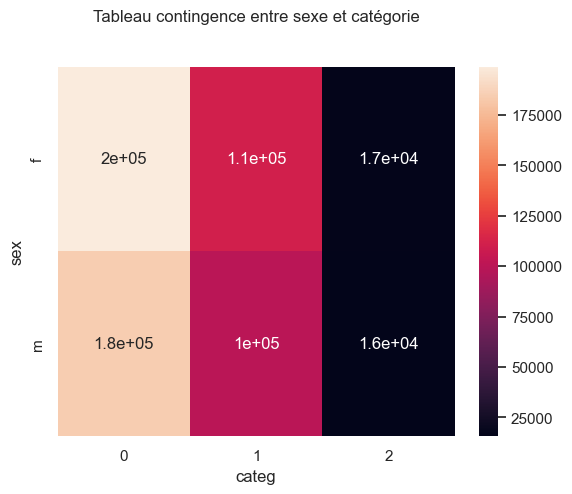

In [52]:
plt.figure()
plt.title("Tableau contingence entre sexe et catégorie",y=1.1)

sns.heatmap(contin_sex_categ,annot=True)

Je peux égaler créer un tableau de contingeance normalisé pour avoir les données en pourcentage

In [53]:
contin_sex_categ_n = pd.crosstab(index=tcp_parti['sex'],columns=tcp_parti['categ'],normalize=True,margins=True)
contin_sex_categ_n

categ,0,1,2,All
sex,,,,
f,0.317683,0.175988,0.026854,0.520525
m,0.294820,0.159583,0.025071,0.479475
All,0.612503,0.335572,0.051925,1.000000


Rappelons que la répartition Hommes / Femmes des clients étaient d'environ 48 - 52

Ce qu'on peut voir c'est que le nombre d'achats est, pour chaque catégorie, légèrement supérieur chez les femmes et que les hommes représente 48 % et les femmes 52 % du nombre total d'achats. La répartition du nombre d'achats suit globalement la logique de la réparition des clients et il ne semble pas qu'une catégorie soit préférée par un des 2 sexes

Maintenant, je vais effectuer un test de CHI-2 permettant de voir si 2 variables qualitatives sont indépendantes

### Test CHI-2 :

In [54]:
chi2, pvalue, degrees, expected = chi2_contingency(contin_sex_categ)
print("Test de CHI-2 :\n\nL'hypothèse H0 est : Les variables 'sex' et 'categ' sont indépendantes\n\nL'hypothèse H1 est : "
      "\Les variables 'sex' et 'categ' ne sont pas indépendantes\n\nH0 est rejetée lorsque la P-valeur < 5 %\n\nChi-2 =",
      round(chi2,2),"\ndegrés =",degrees,"\nP-valeur =",round(pvalue*100,3),"%\n\nIci la P-valeur est donc inférieur au "
      "seuil des 5 %, donc on accepte H1")

Test de CHI-2 :

L'hypothèse H0 est : Les variables 'sex' et 'categ' sont indépendantes

L'hypothèse H1 est : \Les variables 'sex' et 'categ' ne sont pas indépendantes

H0 est rejetée lorsque la P-valeur < 5 %

Chi-2 = 19.72 
degrés = 2 
P-valeur = 0.005 %

Ici la P-valeur est donc inférieur au seuil des 5 %, donc on accepte H1


Le résultat du test n'exclut donc pas un possible lien de dépendance entre **sex** et **categ**

Je vais alors effectuer un autre test, le test de Cramet, permettant de mesurer l'intensité d'une relation entre 2 variables

### Test de Cramer :

In [55]:
V = V = np.sqrt(chi2/tcp_parti['client_id'].nunique()*degrees)
print("Test de Cramer :\n\nLe V de Cramer se calcule à partir des valeurs Chi-2 et du degrés obtenus par le test CHI-2"
      "\n\nV = √(Chi-2/(n*degrés)) avec n la taille de l'échantillon"
      "\n\nSi V < 0.1, alors la relation est nulle ou très faible\nSi V >= 0.1 et < 0.2, alors la realtion est faible"
      "\nSi V >= 0.2 et < 0.3 la relation est moyenne\nSi V >= 0.3 la relation est forte\n\nIci V =",round(V,2),
      "donc la relation de dépendance entre 'sex' et 'categ' est très faible")

Test de Cramer :

Le V de Cramer se calcule à partir des valeurs Chi-2 et du degrés obtenus par le test CHI-2

V = √(Chi-2/(n*degrés)) avec n la taille de l'échantillon

Si V < 0.1, alors la relation est nulle ou très faible
Si V >= 0.1 et < 0.2, alors la realtion est faible
Si V >= 0.2 et < 0.3 la relation est moyenne
Si V >= 0.3 la relation est forte

Ici V = 0.07 donc la relation de dépendance entre 'sex' et 'categ' est très faible


En effet il existe tout de même un lien de dépendance entre **sex** et **categ**, cependant celui-ci est très faible et n'est pas forcément pertinent de le relever

&nbsp;

### <font color ='green' > B - Relation - Age x Panier total / Panier moyen / Fréquence d'achat
    
&nbsp;    

Pour cette partie, j'utilise le dataframe groupé par client particuliers, qui dispose déjà des variables **age** et **panier_total**, cependant je n'ai pas encore de variables concernant le panier moyen et la fréquence d'achat

Je vais ainsi ajouter 3 nouvelles variables :

- **nombre_sessions** indiquant le nombre de sessions différente d'achat en ligne d'un client et qui permettra le calcul des 2 autres variables 


- **panier_moyen_session** indiquant le montant moyen du panier d'un client par session d'achat en ligne


- **jours_par_session** indiquant le nombre de jours moyen entre 2 sessions d'achat en ligne

In [56]:
tcp_client_parti.head()

,client_id,sex,birth,age,jours_achat,nombre_achats,panier_total,statut,tranche_age,nombre_clients
0,c_1,m,1955,67,583.0,38,547.19,particulier,51-70,1
1,c_10,m,1956,66,677.0,58,1353.60,particulier,51-70,1
2,c_100,m,1992,30,518.0,8,254.85,particulier,18-30,1
3,c_1000,f,1966,56,682.0,124,2233.35,particulier,51-70,1
4,c_1001,m,1982,40,718.0,101,1793.66,particulier,31-50,1


In [57]:
tcp_parti_bis = tcp_parti[['session_id','client_id','nombre']]
tcp_parti_bis = tcp_parti_bis.groupby(['session_id','client_id'],as_index=False).sum()
tcp_parti_bis['nombre_sessions'] = 1
tcp_parti_bis = tcp_parti_bis.groupby('client_id').sum()
tcp_parti_bis.drop(columns='nombre',inplace = True)
tcp_client_parti = pd.merge(tcp_client_parti,tcp_parti_bis,on='client_id',suffixes=None)
tcp_client_parti['panier_moyen_session'] = tcp_client_parti['panier_total'] / tcp_client_parti['nombre_sessions']
tcp_client_parti['jours_par_session'] = tcp_client_parti['jours_achat'] / tcp_client_parti['nombre_sessions']
tcp_client_parti.drop(columns={'birth','statut','nombre_clients'})
tcp_client_parti = tcp_client_parti[['client_id','sex','age','tranche_age','panier_total','nombre_achats','jours_achat','nombre_sessions','panier_moyen_session','jours_par_session']]
tcp_client_parti.head()

C:\Users\narab\AppData\Local\Temp\ipykernel_9876\2346625538.py:6: FutureWarning: Passing 'suffixes' as a <class 'NoneType'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  tcp_client_parti = pd.merge(tcp_client_parti,tcp_parti_bis,on='client_id',suffixes=None)


,client_id,sex,age,tranche_age,panier_total,nombre_achats,jours_achat,nombre_sessions,panier_moyen_session,jours_par_session
0,c_1,m,67,51-70,547.19,38,583.0,32,17.099688,18.218750
1,c_10,m,66,51-70,1353.60,58,677.0,34,39.811765,19.911765
2,c_100,m,30,18-30,254.85,8,518.0,5,50.970000,103.600000
3,c_1000,f,56,51-70,2233.35,124,682.0,93,24.014516,7.333333
4,c_1001,m,40,31-50,1793.66,101,718.0,47,38.162979,15.276596


Maintenant que j'ai à disposition toutes les variables utiles pour mes analyses, je vais commencer par regarder leur distribution pour voir si elles suivent une distribution Normale

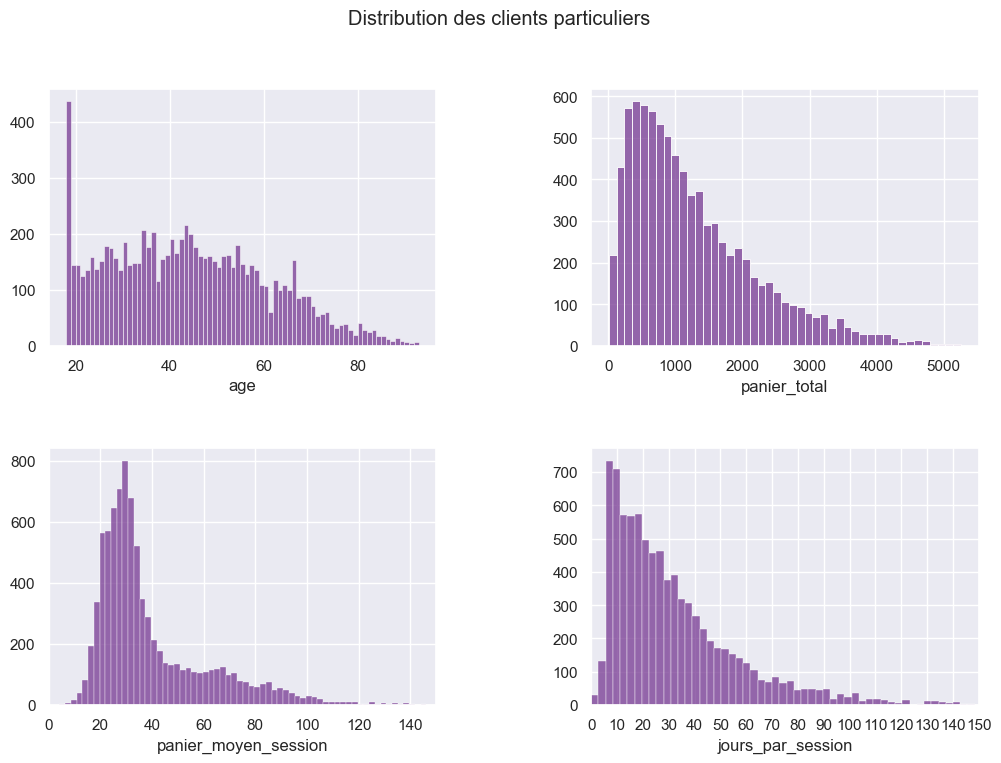

In [58]:
plt.figure(figsize=(12,8))
plt.suptitle('Distribution des clients particuliers')

plt.subplot(221)
sns.histplot(x=tcp_client_parti['age'], bins=75,color='#763892')
plt.ylabel('')

plt.subplot(222)
sns.histplot(data=tcp_client_parti,x='panier_total',color='#763892')
plt.ylabel('')

plt.subplot(223)
sns.histplot(data=tcp_client_parti,x='panier_moyen_session',color='#763892')
plt.xlim(0,150)
plt.ylabel('')

plt.subplot(224)
sns.histplot(data=tcp_client_parti,x='jours_par_session',color='#763892')
plt.xticks(np.arange(0,160,10))
plt.xlim(0,150)
plt.ylabel('')

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

A priori, aucune de ces variables ne semblent suivre une distribution Normale

Pour vérifier cela, je vais effectuer des tests de Shapiro permettant de dire si une variable suit ou ne suit pas une loi Normale

### Tests de Shapiro :

In [59]:
shapiro_age = stats.shapiro(tcp_client_parti['age'])
shapiro_panier_total = stats.shapiro(tcp_client_parti['panier_total'])
shapiro_panier_moyen = stats.shapiro(tcp_client_parti['panier_moyen_session'])
shapiro_jours_session = stats.shapiro(tcp_client_parti['jours_par_session'])

print("Test de Shapiro :\n\nH0 : La variable suit une distribution normale\n\nH0 est rejetée si P-valeur < 5 %"
      "\n\n\nPour 'age' : Stats =", round(shapiro_age.statistic,2),"et P-valeur =",shapiro_panier_total.pvalue,
      "\n\nPour 'panier_total' : Stats =", round(shapiro_panier_total.statistic,2),"et P-valeur =",shapiro_panier_total.pvalue,
      "\n\nPour 'panier_moyen_session' : Stats =", round(shapiro_panier_moyen.statistic,2),"et P-valeur =",shapiro_panier_moyen.pvalue,
      "\n\nPour 'jours_par_session' : Stats =", round(shapiro_jours_session.statistic,2),"et P-valeur =",shapiro_jours_session.pvalue,
      "\n\n\nPour les 4 variables la P-valeur = 0, donc aucune de ces variables ne suit une distribution Normale")

Test de Shapiro :

H0 : La variable suit une distribution normale

H0 est rejetée si P-valeur < 5 %


Pour 'age' : Stats = 0.97 et P-valeur = 0.0 

Pour 'panier_total' : Stats = 0.9 et P-valeur = 0.0 

Pour 'panier_moyen_session' : Stats = 0.81 et P-valeur = 0.0 

Pour 'jours_par_session' : Stats = 0.79 et P-valeur = 0.0 


Pour les 4 variables la P-valeur = 0, donc aucune de ces variables ne suit une distribution Normale


C:\Users\narab\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Aucune de ces variables ne suit une loi Normale, par conséquent il faudra utiliser des tests non paramétriques pour mesurer statistiquement les corrélations entre les variables si elles existent

### Age x Panier total

Je commence par regarder le cas de la variable **panier_total** avec **age** 

Dans un 1er temps, je vais regarder via un diagramme de dispersion en y ajoutant la droite de régression linéaire

In [60]:
X1 = tcp_client_parti[["age"]] 
Y1 = tcp_client_parti["panier_total"] 
X1 = X1.copy() 
X1['intercept'] = 1. 
result = sm.OLS(Y1, X1).fit() 
a1,b1 = result.params['age'],result.params['intercept']

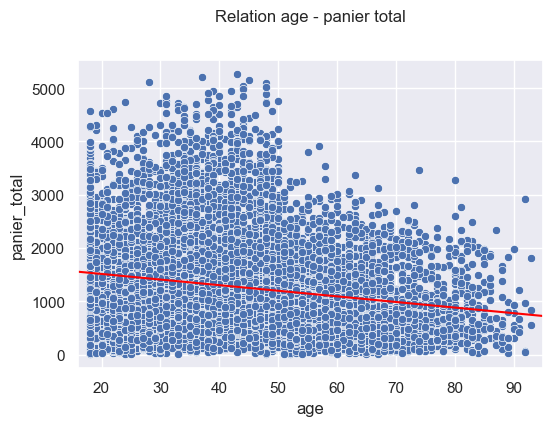

In [61]:
plt.figure(figsize=(6,4))
plt.title("Relation age - panier total", y=1.1)

sns.scatterplot(data=tcp_client_parti,x='age',y='panier_total')
plt.plot(np.arange(100),[a1*x+b1 for x in np.arange(100)],c='red')
plt.xlim(16,95)

plt.show()

In [62]:
print("Droite de régression linéaire d'équation : Y (panier total) =",round(a1,2),"X (age) +",round(b1,2))

Droite de régression linéaire d'équation : Y (panier total) = -10.51 X (age) + 1723.2


Par ce graphique on peut constater, notamment via la droite de régression, une tendance décroissante du panier total en fonction de l'age

On remarque, en particuliers, une cassure au niveau de 50 ans, où les paniers totaux les plus élevés sont nettement inférieurs et moins fréquent après 50 ans

Cependant, ce graphique regroupe un certains nombre de points et il est difficile d'y voir claire. Un graphique boxplot peut être une alternative afin d'y voir plus claire 

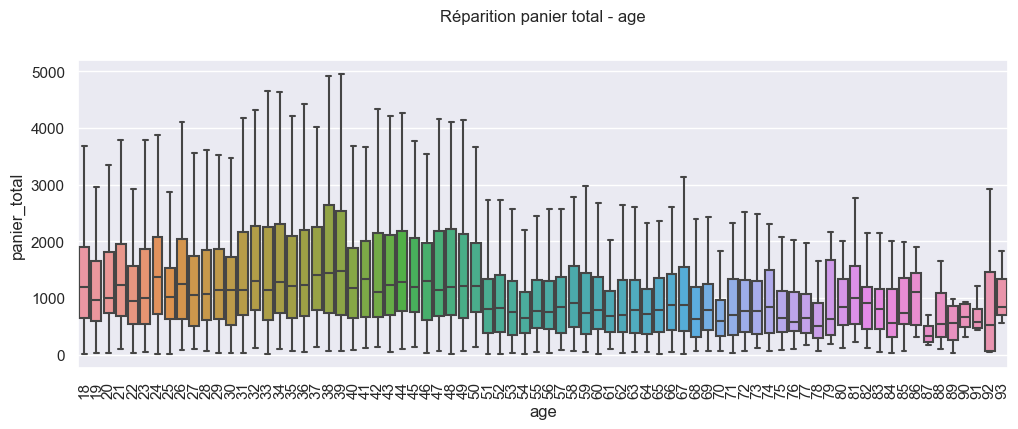

In [63]:
plt.figure(figsize=(12,4))
plt.title("Réparition panier total - age", y=1.1)

sns.boxplot(data=tcp_client_parti,x='age',y='panier_total',showfliers=False)
plt.xticks(rotation=90)

plt.show()

Logiquement on retrouve la cassure avant / après 50 ans, avec de 51 à 93 ans des paniers totaux nettement inférieurs et des extrêmes plus ressérrés

On peut également observer une légère différence entre les 18-30 ans et 31-50 ans. Pour les 31-50 ans la répartition est un plus dispersée et légèrement supérieure en tout point (médiane, quartiles et extrêmes) par rapport aux 18-30 ans

Pour résumer, on aurait 3 classes d'âges qui se distinguent : 18-30, 31-50 et 51+ 

Avec un tendance telle que : panier total (51+) < panier total (18-30) < panier total(31-50) 

&nbsp; 

Maintenant je vais effectuer un test de corrélation de Spearman (non paramétrique), permettant de calculer le coefficient de corrélation et de vérifier s'il existe ou non une corrélation entre 2 variables

### Test de Spearman :

In [64]:
spearman_age_panier_total = stats.spearmanr(tcp_client_parti["age"],tcp_client_parti["panier_total"])
print("Test de Spearman :\n\nH0 : Il n'y a pas de corrélation entre les 2 variables\n\nH1 : Il existe une corrélation entre "
      "les 2 variables\n\nH0 est rejetée si P-valeur < 5 %\n\nIci, coeff cor =",round(spearman_age_panier_total.correlation,2),
      "et P-valeur =",round(spearman_age_panier_total.pvalue,3),"\n\nH0 est donc rejetée et on accepte H1")

Test de Spearman :

H0 : Il n'y a pas de corrélation entre les 2 variables

H1 : Il existe une corrélation entre les 2 variables

H0 est rejetée si P-valeur < 5 %

Ici, coeff cor = -0.19 et P-valeur = 0.0 

H0 est donc rejetée et on accepte H1


S'il existe bel et bien une corrélation entre **age** et **panier_total**, le coefficient de corrélation permet de mesurer l'ampleur de cette corrélation. Pour ces 2 variables, le coefficient est < 0 et sa valeur absolue < 0.19 ce qui indique une corrélation très faible et négative

En effet comme on avait pu le consater via les graphiques ci-dessus, on avait une tendance décroissante avec une forte diminution du panier total a partir de 51 ans, mais cependant on obersait une augmentation du panier total pour les 31-50 ans par rapport au 18-30ans, ce qui explique la très faible valeur du coefficent

### Age x Panier moyen

Maintenant, je vais me pencher sur le cas de la variable **panier_moyen_session** avec **age**

De la même manière que pour **panier_total** avec **age**, je vais réitirer les étapes précédentes et les appliquer sur **panier_moyen_session**

In [65]:
X2 = tcp_client_parti[["age"]] 
Y2 = tcp_client_parti["panier_moyen_session"] 
X2 = X2.copy() 
X2['intercept'] = 1. 
result = sm.OLS(Y2, X2).fit() 
a2,b2 = result.params['age'],result.params['intercept']

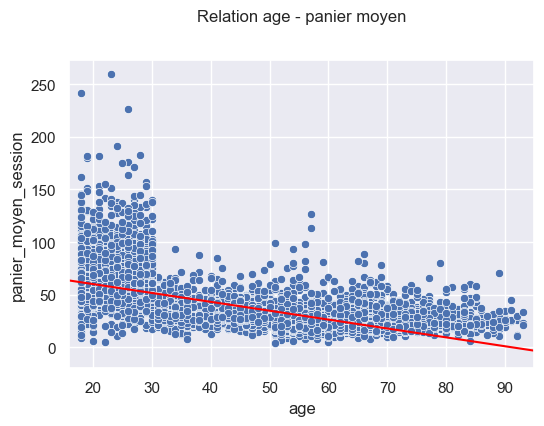

In [66]:
plt.figure(figsize=(6,4))
plt.title("Relation age - panier moyen", y=1.1)

sns.scatterplot(data=tcp_client_parti,x='age',y='panier_moyen_session')
plt.plot(np.arange(100),[a2*x+b2 for x in np.arange(100)],c='red')
plt.xlim(16,95)

plt.show()

In [67]:
print("Droite de régression linéaire d'équation : Y (panier moyen) =",round(a2,2),"X (age) +",round(b2,2))

Droite de régression linéaire d'équation : Y (panier moyen) = -0.84 X (age) + 77.06


Par ce graphique on peut constater, notamment via la droite de régression, une tendance décroissante du panier moyen en fonction de l'age

On remarque surtout, des paniers moyens très dispersés avec beaucoup de valeurs élevés ches les 18-30ans, puis cela semble plus équilibré au delà de 31 ans, avec des valeurs basses et moins dispersées  

Tout comme pour **panier_total** et **age**, je vais également regarder la répartition via un boxplot

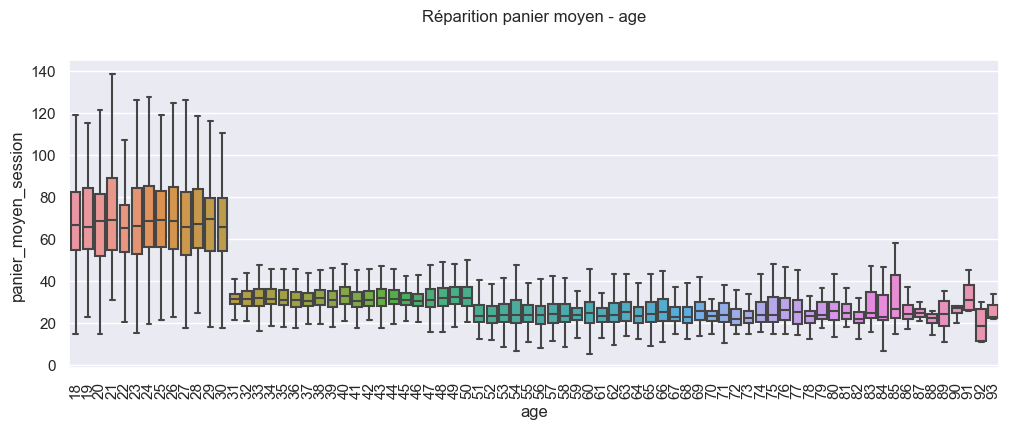

In [68]:
plt.figure(figsize=(12,4))
plt.title("Réparition panier moyen - age", y=1.1)

sns.boxplot(data=tcp_client_parti,x='age',y='panier_moyen_session',showfliers=False)
plt.xticks(rotation=90)

plt.show()

C'était déjà plutôt lisible sur le diagramme de dispersion, on retrouve aussi 3 classes d'âges disctintes avec pour 18-30 ans des paniers moyens très largement supérieurs au 2 autres classes, avec une très forte dispersion.

Puis que ce soit pour les 31-50 ans et les 51+ ans, le montant des paniers moyens chute fortement avec tout de même des paniers moyen légèrement supérieur pour les 31-50 ans par rapport au 51+ ans et avec très peu de dispersion pour les 2 classes d'âge.

Ici La décroissance en fonction de l'âge est bien notable et on a une tendance telle que : 

panier moyen (51+) < panier moyen (31-50) <  panier moyen (18-30)


&nbsp; 

Je vais maintenant vérifier via un nouveau test de Spearman s'il existe ou non une corrélation avec ces 2 variables

### Test de Spearman :

In [69]:
spearman_age_panier_moyen = stats.spearmanr(tcp_client_parti["age"],tcp_client_parti["panier_moyen_session"])
print("Test de Spearman :\n\nH0 : Il n'y a pas de corrélation entre les 2 variables\n\nH1 : Il existe une corrélation entre "
      " les 2 variables\n\nH0 est rejetée si P-valeur < 5 %\n\nIci, coeff cor =",round(spearman_age_panier_moyen.correlation,2),
      "et P-valeur =",round(spearman_age_panier_moyen.pvalue,3),"\n\nH0 est donc rejetée et on accepte H1")

Test de Spearman :

H0 : Il n'y a pas de corrélation entre les 2 variables

H1 : Il existe une corrélation entre  les 2 variables

H0 est rejetée si P-valeur < 5 %

Ici, coeff cor = -0.7 et P-valeur = 0.0 

H0 est donc rejetée et on accepte H1


Il existe en effet une corrélation entre **age** et **panier_moyen_session**, cette fois-ci la valeur absolue du coefficient de corrélation est plus grande que pour le cas précédent, donc l'ampleur de la corrélation est plus importante. Pour ces 2 variables, le coefficient est < 0 et sa valeur absolue est compris en 0.7 et 0.89 ce qui indique une corrélation forte et négative

Logiquement la corrélation est très largement supérieure au cas précédent, notamment par une décroissance visible entre chaque classe d'âge  

### Age x Jours par session

Ici j'utiliserai la variable **jours_par_session** qui me permettra, en prenant le résultat opposé , d'établir un lien entre l'age et la fréquence d'achat (plus la valeur de cette variable est élevée, plus la fréquence d'achat est faible)

In [70]:
X3 = tcp_client_parti[["age"]] 
Y3 = tcp_client_parti["jours_par_session"] 
X3 = X3.copy() 
X3['intercept'] = 1. 
result = sm.OLS(Y3, X3).fit() 
a3,b3 = result.params['age'],result.params['intercept']

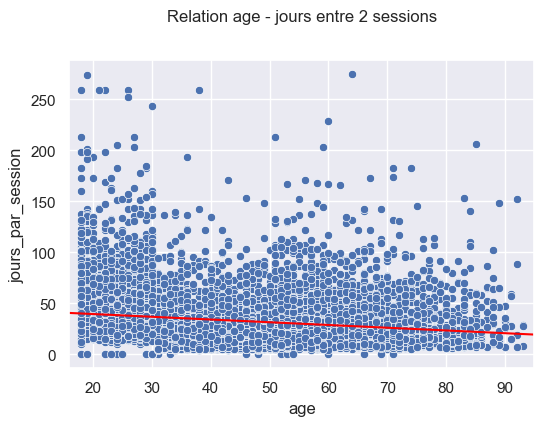

In [71]:
plt.figure(figsize=(6,4))
plt.title("Relation age - jours entre 2 sessions", y=1.1)

sns.scatterplot(data=tcp_client_parti,x='age',y='jours_par_session')
plt.plot(np.arange(100),[a3*x+b3 for x in np.arange(100)],c='red')
plt.xlim(16,95)

plt.show()

In [72]:
print("Droite de régression linéaire d'équation : Y (jours entre 2 sessions) =",round(a3,2),"X (age) +",round(b3,2))

Droite de régression linéaire d'équation : Y (jours entre 2 sessions) = -0.27 X (age) + 44.79


Ici, la droite de régression indiquerait une très faible décroissance du nombre de jours entre 2 sessions en fonction de l'âge. 

Sur ce graphique les différences entre les classes d'âges ne sont pas forcément bien marqués, on remarque tout de même beaucoup un peu plus de dispersion et de valeurs élévées pour les 18-30 et les 51-70 que chez les 31-50 et les 70+, ce qui expliquerait la légère décroissance de la droite de régression

Egalement, je vais regarder cette répartition via un graphique boxplot, en espérant y voir plus clair

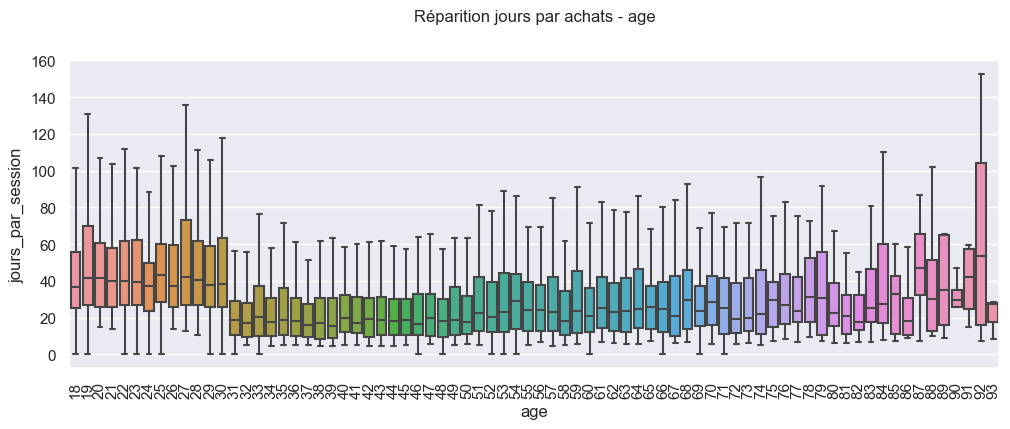

In [73]:
plt.figure(figsize=(12,4))
plt.title("Réparition jours par achats - age", y=1.1)

sns.boxplot(data=tcp_client_parti,x='age',y='jours_par_session',showfliers=False)
plt.xticks(rotation=90)

plt.show()

Avec ce graphique, on peut voir que les 18-30 ans sont ceux dont les valeurs du nombre de jours entre 2 sessions sont les plus élevés et les plus dispersés.

Ensuite, on observe une baisse de valeur et de dispersion chez les 51+ ans. A partir du diagramme de dispersion, on aurait pu supposer qu'il y aurait encore une baisse de valeur et de dispersion des 71+ ans par rapport au 51-70 ans, ce qui n'est pas forcément le cas ici. On notera aussi beaucoup de variation parmis les boites des 71+ ans, mais comme on avait pu l'observer le nombre de clients diminuait fortement après 70 ans et représentait une faible proportion, et plus les échantillons sont faibles plus la possibilité de variations est grande

Puis pour les 31-50 ans, les valeurs du nombre de jours entre 2 sessions sont plus basses et concentrées

En prenant l'opposé de ce que nous dit ce graphique, on a une tendance telle que : 

fréquence achat (18-30) < fréquence achat (51+) < fréquence achat (31-50)

&nbsp; 

On vérifie encore une fois s'il esxiste un lien de corrélation entre ces 2 variables par un test de Spearman

### Test de Spearman :

In [74]:
spearman_age_jours_achat = stats.spearmanr(tcp_client_parti["age"],tcp_client_parti["jours_par_session"])
print("Test de Spearman :\n\nH0 : Il n'y a pas de corrélation entre les 2 variables\n\nH1 : Il existe une corrélation entre "
      " les 2 variables\n\nH0 est rejetée si P-valeur < 5 %\n\nIci, coeff cor =",round(spearman_age_jours_achat.correlation,2),
      "et P-valeur =",round(spearman_age_jours_achat.pvalue,3),"\n\nH0 est donc rejetée et on accepte H1")

Test de Spearman :

H0 : Il n'y a pas de corrélation entre les 2 variables

H1 : Il existe une corrélation entre  les 2 variables

H0 est rejetée si P-valeur < 5 %

Ici, coeff cor = -0.21 et P-valeur = 0.0 

H0 est donc rejetée et on accepte H1


Il existe également une corrélation entre **age** et **jours_par_session**, un peu plus importante que la corrélation de l'age et le panier total. Le coefficient est < 0 et sa valeur absolue > 0.2 et <0.39 ce qui indique une corrélation faible et négative

La corrélation s'explique notamment par la classe 18-30 ans dont le nombre de jours entre 2 sessions est en général très supérieur au reste

### Récapitulatif :

Il existe en effet des corrélations entre **age** et **panier_total**, **age** et **panier_moyen_session** et **age** et **jours_par_session**. Si les corrélations de l'age avec le panier total et la fréquence d'achat sont plutôt faibles, en revanche il y a une forte corrélation de l'age avec le panier moyen

La visualiton graphique nous a permi d'observer une division de nos clients en 3 classes d'âges : 18-30 ans , 31-50 ans et 51+ ans

Avec ces classes d'âges, on peut estimer des ordres de comparaison généralement vrais, tels que :


- panier total (51+) << panier total (18-30) < panier total(31-50)


- panier moyen (51+) < panier moyen (31-50) <<< panier moyen (18-30)


- fréquence achat (18-30) << fréquence achat (51+) < fréquence achat (31-50)


*(Avec '<' pour légèrement inférieur, '<<' pour inférieur et '<<<' largement inférieur)*

&nbsp;

### <font color ='green' > C - Relation - Age x Catégorie
    
&nbsp;    

Dans cette partie, je vais étudier la relation entre **age** et **categ** (1 variable quantitative et 1 variable qualitative)

Ici, je vais utiliser "*tcp_parti*" et je vais commencer par visualiser la répartition des âges pour chacune des catégories via un boxplot 

In [75]:
tcp_parti.head()

,session_id,date,mois,jour,id_prod,price,categ,client_id,sex,birth,age,tranche_age,jours_achat,statut,nombre
0,s_211425,2022-05-20 13:21:29.043970,2022-05,2022-05-20,0_1518,4.18,0,c_103,f,1986,36,31-50,724,particulier,1
1,s_158752,2022-02-02 07:55:19.149409,2022-02,2022-02-02,1_251,15.99,1,c_8534,m,1988,34,31-50,716,particulier,1
3,s_52962,2021-06-24 04:19:29.835891,2021-06,2021-06-24,2_209,69.99,2,c_6941,m,2000,22,18-30,490,particulier,1
4,s_325227,2023-01-11 08:22:08.194479,2023-01,2023-01-11,0_1509,4.99,0,c_4232,m,1980,42,31-50,727,particulier,1
5,s_285425,2022-10-20 15:59:16.084030,2022-10,2022-10-20,0_1418,8.57,0,c_1478,f,1972,50,31-50,728,particulier,1


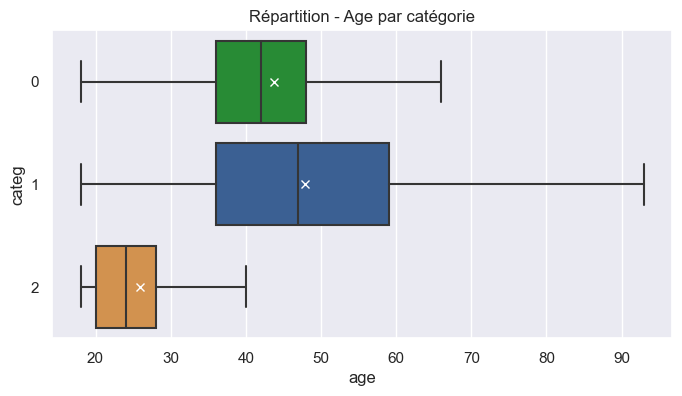

In [76]:
plt.figure(figsize=(8,4))
plt.title("Répartition - Age par catégorie")

sns.boxplot(data=tcp_parti,y='categ',x='age',showmeans=True,palette=['#179B29', '#2D5EA1', '#E89339'],
            meanprops={"marker":"x","markerfacecolor":"white",'markeredgecolor': 'white'},showfliers=False)

plt.show()

On observe que les 3 boites sont toutes différentes, toutefois la différence entre la catégorie 2 et les 2 autres est particulièrement notable

La répartition des âges de la catégorie 2 est beaucoup plus basses et concentrés que celle des autres. La grande majorité des clientssont agés entre 18 et 40 ans, avec la moitié agée de 20 à 28 ans. Si l'on reprend nos classes d'âges, la clientèle principale de la catégorie 2 sont les 18-30 ans

Pour les 2 autres catégories, c'est un plus varié. La catégorie 0 présente une grande majorité des clients sont agés entre 18 et 65 ans, avec la moitié agée de 36 à 48 ans. La clientèle principale de la catégorie 0 serait plutôt les 31-50 ans

Pour la catégorie 1, on observe la variation la plus élevée, avec des clients de tout âge, mais une moitié compris entre 36 et 59 ans. La clientèle semble plus homogène pour cette catégorie, mais on peut supposer que sa clientèle principale serait les 31-50 ans et les 51-70 ans

&nbsp;

Je vais également effectuer un test statistique pour appuyer mon analyse, comme **age** ne suit pas une distribution Normale, je vais utiliser le test, non paramétrique, de Kruskal-Wallis permettant de tester si les distributions de chacun des groupes sont proches

Ici les groupes correspondent aux 3 catégories, je vais d'abord créer 3 sous-dataframes de "*tcp_parti*" filtrés sur chacune des catégorie, afin de les utiliser pour le test

### Test de Kruskal-Wallis

In [77]:
c0 = tcp_parti.loc[tcp_parti['categ']==0]
c1 = tcp_parti.loc[tcp_parti['categ']==1]
c2 = tcp_parti.loc[tcp_parti['categ']==2]
kruskal = stats.kruskal(c0['age'],c1['age'],c2['age'])
print("Test de Kurskal-Wallis :\n\nH0 : H0 :  les différences entre les médianes ne sont pas statistiquement significatives"
      "\n\nH1 : les différences entre certaines médianes sont statistiquement significatives\n\nH0 est rejetée si P-valeur < 5 %"
      "\n\nIci la P-valeur =",round(kruskal.pvalue,3),"donc H0 est rejetée et on accepte H1")

Test de Kurskal-Wallis :

H0 : H0 :  les différences entre les médianes ne sont pas statistiquement significatives

H1 : les différences entre certaines médianes sont statistiquement significatives

H0 est rejetée si P-valeur < 5 %

Ici la P-valeur = 0.0 donc H0 est rejetée et on accepte H1


Logiquement, ce test concorde avec ce que l'on a pu observé avec le graphique boxplot, où notamment la médiane de la catégorie 2 diffère très largement de celle des 2 autres catégorie

Je vais également regarder la répartition du chiffre d'affaires des différentes catégories pour chaque classe d'âge pour avoir une vision supplémentaire sur la relation entre l'âge et la catégorie

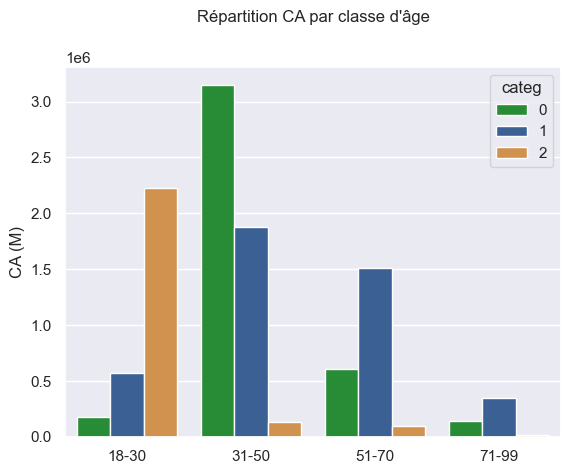

In [78]:
plt.figure()
plt.title("Répartition CA par classe d'âge",y=1.1)

sns.barplot(data=tcp_parti, x='tranche_age', y='price',order=['18-30','31-50','51-70','71-99'],ci=None, 
            palette=['#179B29', '#2D5EA1', '#E89339'],estimator=np.sum, hue='categ')
plt.ylabel('CA (M)')
plt.xlabel('')

plt.show()

Avec ce graphique, on retrouve les catégories majeures de chaque classe d'âge :

Pour les 18-30 ans, la grande partie du chiffre d'affaires provient de la vente de produits de catégorie 2, avec un peu de catégorie 1 et très peu de catégorie 0

Pour les 31-50 ans, on retrouve un chiffre d'affaires très important pour les produits catégorie 0 suivi d'un chiffre d'affaire également important pour la catégorie 1 et très faible pour la catégorie 2

Pour les 50+ ans, principalement un chiffre d'affaires pour la catégorie 1, avec un peu de catégorie 0 et très peu de catégorie 2

&nbsp;

## <font color=#2921CA> Conclusion

&nbsp;

Lors des différentes analyses, que j'ai effectué sur la base de données des transactions de la boutique en ligne, j'ai pu noter
quelques points importants :

&nbsp;

**Depuis son l'ouverture de la boutique (il y a 2 ans) :**


- CA total = 11.9M €


- CA/mois = 500k € (en moyenne) sauf pour Octobre 2021 = 320k € (baisse de 34% - pénurie de catégorie 1)



&nbsp;

**A propos des produits :**


- Prix : catégorie 0 < catégorie 1 < catégorie 2


- Nombre de ventes : catégorie 0 > catégorie 1 > catégorie 2


- CA : catégorie 1 ~ catégorie 0 > catégorie 2


- Tops produits : catégorie 1 (nombre de ventes) & catégorie 2 (CA)


&nbsp;

**A propos des clients :**


- 8600 clients dont 4 clients professionnels (Au minimun, CA d'un professionnel > 21 x CA d'un particulier)


- CA  des 4 clients professionnels = 880k € (7.4 % CA total)


- Réparition 50-50 % des clients pour atteindre 80-20 % du CA


- Répartition 50-50 % du CA généré par 79-21 % des clients


- Répartition du genre : 48-52 % Hommes-Femmes


- Répartition de l'âge : 71+ ans <<< 18-30 ans ~ 51-70 ans < 31-50 ans

&nbsp;


**Relations entre certaines variables :** 


- Répartition du nombre de ventes : 48-52 % Hommes-Femmes (~ répartition des clients)


- Panier total : 51+ ans << 18-30 ans < 31-50 ans


- Panier moyen : 51+ ans < 31-50 ans <<< 18-30 ans


- Fréquence d'achat : 18-30 ans << 51+ ans < 31-50 ans


- Catégorie 0 : Majorité de 31-50 ans


- Catégorie 1 : Majorité de 31-50 ans & 51-70 ans


- Catégorie 2 : Majorité de 18-30 ans

&nbsp;

### Recommandations

Les 31-50 ans, qui compose la plus grande partie des clients, sont ceux qui achètent le plus fréquemment et également ceux dont le panier total moyen est le plus élevé. Il en convient de dire qu'ils réprésentent la classe d'âge primaire en terme de chiffre d'affaires. 

Ensuite, les 18-30 ans et les 51-70 ans représentent des classes d'âge importantes mais plutôt secondaires. Quand aux 71+ ans il représente une classe tertiare et minoritaire, mais comme ils présentent des habitudes d'achat très proche des 51-70 ans, on peut ainsi les rallier au 51-70 ans.  

&nbsp;

Pour les 31-50 ans, principalement orientés vers des produits de catégorie 0 et plus faiblement de catégorie 1 (les moins chers et les plus vendus), il peut-être intéressant d'établir des stratégies de fidélisation sur ces catégories (en particulier la catégorie 0), ou alors essayer de les amener également vers des produits de catégorie 2 (les plus chers et les moins vendus, mais figurant dans nos tops ventes) via des offres promotionnelles

&nbsp;

Les 18-30 ans, principalement orientés vers des produits de catégorie 2, dont il représente une forte majorité des achats, sont en revanche peu axé sur des produits de catégorie 0 et 1 (ce qui explique des panier moyen très élevés et une fréquence d'achat très basse). Inversement au 31-50 ans, il peut être intéressant d'établir des stratégies de fidélisation sur la catégorie 2, ou alors essayer de les amener vers des produits de catégorie 0 et 1 vua des offres promotionnelles

&nbsp;

Les 51+ ans, principalement orientés vers des produits de catégorie 1 et plus faiblement de catégorie 0, tout comme les 31-50 ans, il peut-être intéressant d'établir des stratégies de fidélisation sur ces catégories (en particulier la catégorie 1), ou alors essayer de les amener également vers des produits de catégorie 2 via des offres promotionnelles





